### To calculate the Overall Hospital Quality Star Rating, the measures are categorized into seven mutually exclusive groups: 
##### 1. Outcomes – Mortality (7 measures) 
##### 2. Outcomes – Safety of Care (8 measures)
##### 3. Outcomes – Readmissions (8 measures) 
##### 4. Patient Experience (11 measures) 
##### 5. Process – Effectiveness of Care (18 measures) 
##### 6. Process – Timeliness of Care (7 measures) 
##### 7. Efficiency – Outpatient Imaging Use (5 measures) 

These seven groups generally align with the categories on the Hospital Compare website, the CMS Hospital Value-Based Purchasing (VBP) Program, and other national quality initiatives.

Listed below are the measures included in each group:

#### Mortality (N=7)
MORT-30-AMI, MORT-30-CABG, MORT-30-COPD, MORT-30-HF, MORT-30-PN, MORT-30-STK, PSI-4-SURGCOMP

#### Safety of Care (N=8)
HAI-1, HAI-2, HAI-3, HAI-4, HAI-5, HAI-6, COMP-HIP-KNEE, PSI-90-Safety

#### Readmission (N=8)
READM-30-AMI, READM-30-CABG, READM-30-COPD, READM-30-HF, READM-30-HipKnee, READM-30-PN, READM-30-STK, READM-30-HOSPWIDE

#### Patient Experience (N=11)
H-CLEAN-HSP, H-COMP-1, H-COMP-2, H-COMP-3, H-COMP-4, H-COMP-5, H-COMP-6, H-HSP-RARTING, H-QUIET-HSP, H-RECMND, H-COMP-7

#### Effectiveness of Care (N=18)
CAC-3, IMM-2, IMM-3-OP-27-FAC-ADHPCT, OP-4, OP-22, OP-23, OP-29, OP-30, PC-01, STK-1, STK-4, STK-6, STK-8,  VTE-1, VTE-2, VTE-3, VTE-5, VTE-6

#### Timeliness of Care (N=7)
ED-1b, ED-2b, OP-3b, OP-5, OP-18b, OP-20, OP-21

#### Efficient Use of Medical Imaging (N=5)
OP-8, OP-10, OP-11, OP-13, OP-14


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Reading General info.
general_info = pd.read_csv("Hospital General Information.csv",encoding = "ISO-8859-1")

In [3]:
general_info.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


#### Checking Ownership of the hospitals
Let us check how many hospitals are owned by a particular individual or government and others.

In [4]:
general_info['Hospital Ownership'].value_counts()

Voluntary non-profit - Private                 2027
Proprietary                                     799
Government - Hospital District or Authority     567
Voluntary non-profit - Other                    477
Government - Local                              412
Voluntary non-profit - Church                   349
Government - State                               67
Physician                                        66
Government - Federal                             46
Tribal                                            8
Name: Hospital Ownership, dtype: int64

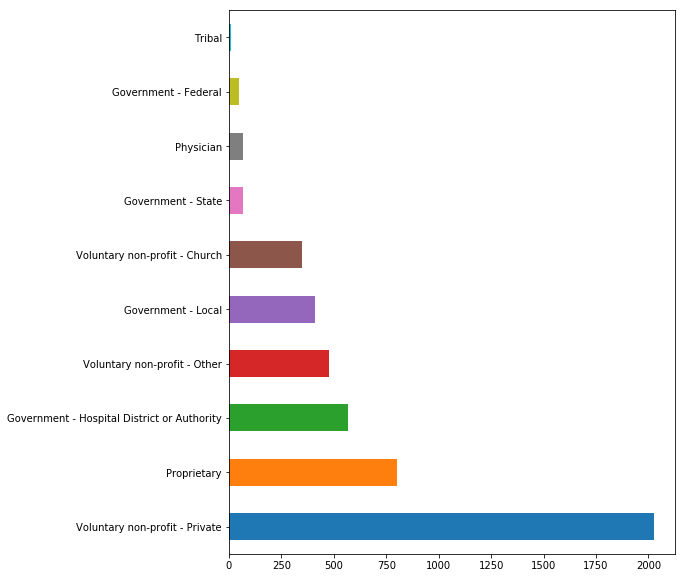

In [5]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)
general_info['Hospital Ownership'].value_counts()[:20].plot(kind='barh')

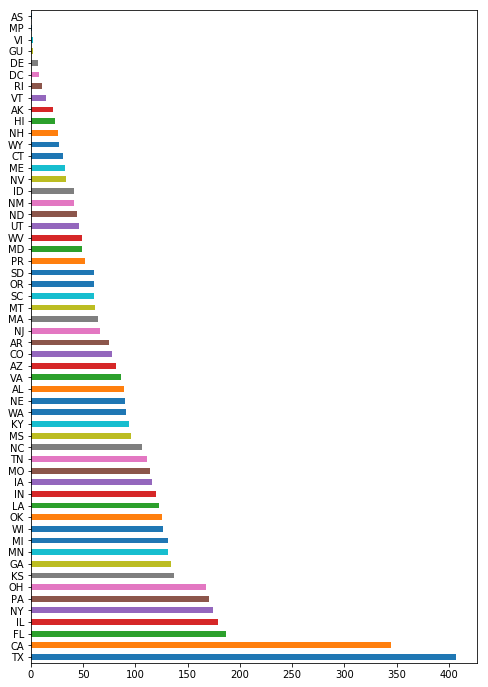

In [6]:
# Statewise distribution
dims = (8, 12)
fig, ax = plt.subplots(figsize=dims)
general_info['State'].value_counts()[:].plot(kind='barh')

### Measures distributions in General info

In [7]:
general_info['Mortality national comparison'].value_counts()

Same as the National average    2736
Not Available                   1337
Above the National average       402
Below the National average       343
Name: Mortality national comparison, dtype: int64

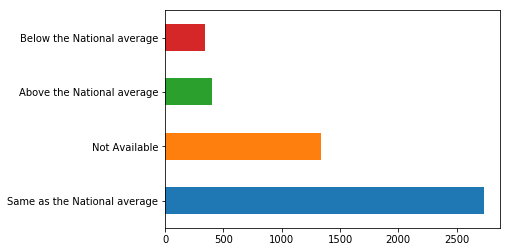

In [8]:
general_info['Mortality national comparison'].value_counts().plot(kind='barh')

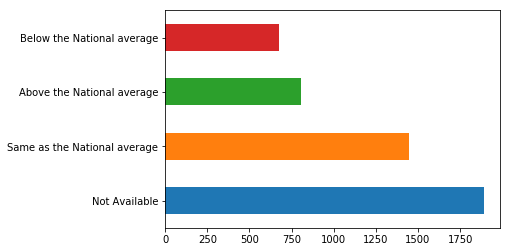

In [9]:
general_info['Safety of care national comparison'].value_counts().plot(kind='barh')

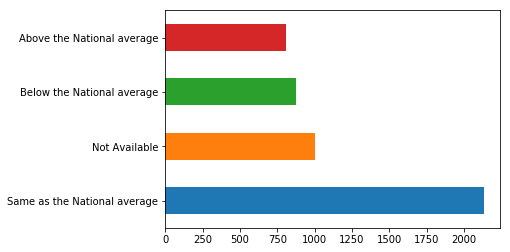

In [10]:
general_info['Readmission national comparison'].value_counts().plot(kind='barh')

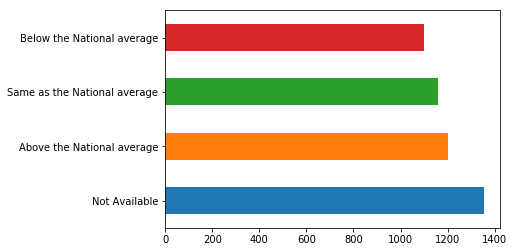

In [11]:
general_info['Patient experience national comparison'].value_counts().plot(kind='barh')

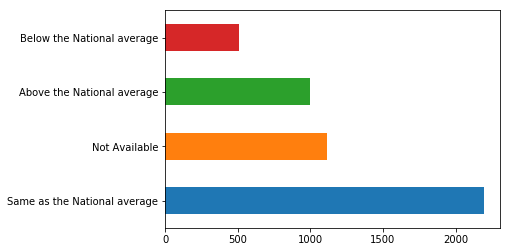

In [12]:
general_info['Effectiveness of care national comparison'].value_counts().plot(kind='barh')

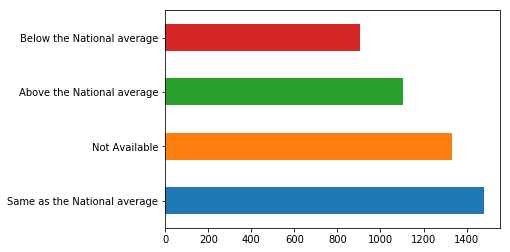

In [13]:
general_info['Timeliness of care national comparison'].value_counts().plot(kind='barh')

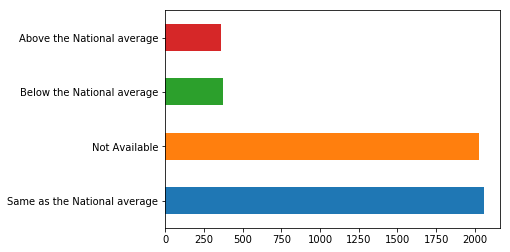

In [14]:
general_info['Efficient use of medical imaging national comparison'].value_counts().plot(kind='barh')

In [15]:
general_info.shape

(4818, 28)

In [16]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (general_info.apply(num_missing, axis=0) )#axis=0 defines that function is to be applied on each column

Missing values per column:
Provider ID                                                         0
Hospital Name                                                       0
Address                                                             0
City                                                                0
State                                                               0
ZIP Code                                                            0
County Name                                                        15
Phone Number                                                        0
Hospital Type                                                       0
Hospital Ownership                                                  0
Emergency Services                                                  0
Meets criteria for meaningful use of EHRs                         435
Hospital overall rating                                             0
Hospital overall rating footnote                               

In [17]:
general_info['Hospital overall rating'].unique()

array(['3', '2', 'Not Available', '4', '5', '1'], dtype=object)

In [18]:
general_info['Hospital overall rating'].value_counts()

3                1772
Not Available    1170
4                 964
2                 684
1                 117
5                 111
Name: Hospital overall rating, dtype: int64

In [19]:
general_info_clean=general_info.drop(general_info[general_info['Hospital overall rating']=='Not Available'].index)

In [20]:
sorted_rating=general_info_clean.sort_values(['Hospital overall rating'], ascending=False)
sorted_rating['Hospital overall rating'].head()
sorted_rating[['Hospital Name','Hospital overall rating']].head()

,Hospital Name,Hospital overall rating
426,SANTA BARBARA COTTAGE HOSPITAL,5
1367,ORTHOINDY HOSPITAL,5
143,MAYO CLINIC HOSPITAL,5
144,BANNER HEART HOSPITAL,5
3394,"OKLAHOMA HEART HOSPITAL, LLC",5


In [21]:
rating_with_5=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='5']
Rating_5=rating_with_5['Provider ID'].count()
rating_with_4=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='4']
Rating_4=rating_with_4['Provider ID'].count()
rating_with_3=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='3']
Rating_3=rating_with_3['Provider ID'].count()
rating_with_2=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='2']
Rating_2=rating_with_2['Provider ID'].count()
rating_with_1=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='1']
Rating_1=rating_with_1['Provider ID'].count()

In [22]:
list=[Rating_5,Rating_4,Rating_3,Rating_2,Rating_1]

In [23]:
sorted_rating['Hospital overall rating'].unique()

array(['5', '4', '3', '2', '1'], dtype=object)

[Text(0, 0.5, 'Number of  hospitals'), Text(0.5, 0, 'Rating out of 5')]

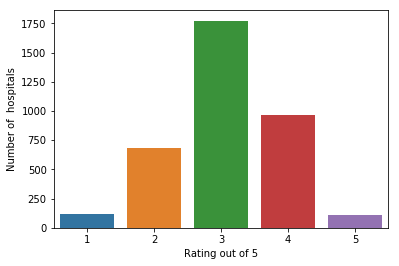

In [24]:
ax=sns.barplot(x=sorted_rating['Hospital overall rating'].unique(),
               y=list,data=general_info)
ax.set(xlabel='Rating out of 5', ylabel='Number of  hospitals')

In [25]:
general_info['Hospital Type'].unique()

array(['Acute Care Hospitals', 'Critical Access Hospitals', 'Childrens'],
      dtype=object)

In [26]:
general_info['Hospital Type'].value_counts()

Acute Care Hospitals         3382
Critical Access Hospitals    1337
Childrens                      99
Name: Hospital Type, dtype: int64

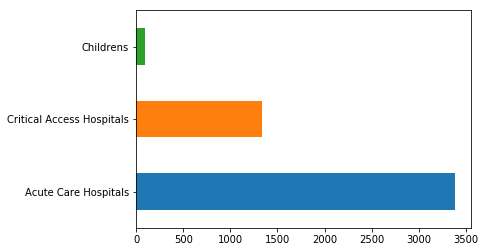

In [27]:
general_info['Hospital Type'].value_counts()[:3].plot(kind='barh')

In [28]:
## Checking 5Start Acute Care Hospitals
State_acute_5=general_info.loc[(general_info["Hospital Type"]=="Acute Care Hospitals") & (general_info["Hospital overall rating"]=="3"),["State"]]
State_critical_5=general_info.loc[(general_info["Hospital Type"]=="Critical Access Hospitals") & (general_info["Hospital overall rating"]=="3"),["State"]]
State_children_5=general_info.loc[(general_info["Hospital Type"]=="Childrens") & (general_info["Hospital overall rating"]=="3"),["State"]]

In [29]:
acute_index=State_acute_5['State'].value_counts().index
acute_values=State_acute_5['State'].value_counts().values
critical_index=State_critical_5['State'].value_counts().index
critical_values=State_critical_5['State'].value_counts().values
children_index=State_children_5['State'].value_counts().index
children_values=State_children_5['State'].value_counts().values

[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Total number of Acute Care hospitals with 3 rating')]

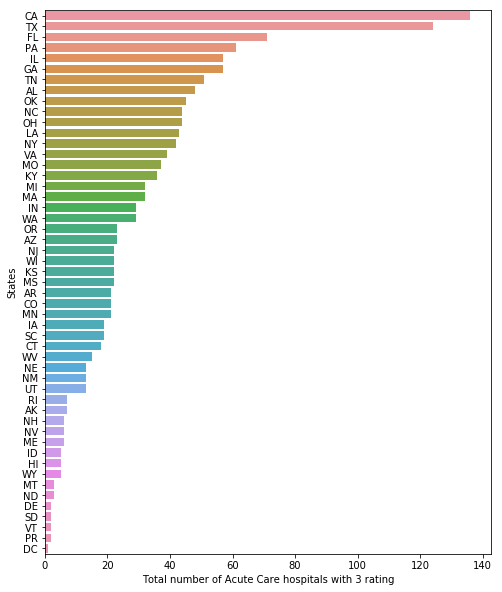

In [30]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)
ax=sns.barplot(y=acute_index,x=acute_values)
ax.set(xlabel='Total number of Acute Care hospitals with 3 rating', ylabel='States')

[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Total number of Critical Access hospitals with 3 rating')]

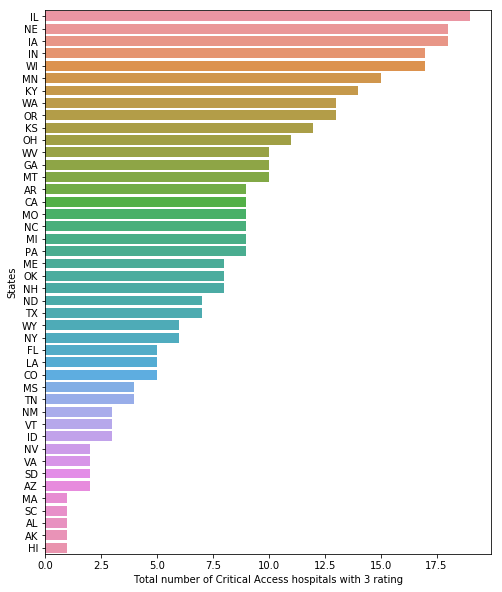

In [31]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)
ax=sns.barplot(y=critical_index,x=critical_values)
ax.set(xlabel='Total number of Critical Access hospitals with 3 rating', ylabel='States')

In [32]:
## Reading Readmission data
Readmission_master = pd.read_csv("Readmissions and Deaths - Hospital.csv",encoding = "ISO-8859-1")

In [33]:
Readmission_master.head(5).T

,0,1,2,3,4
Provider ID,10001,10001,10001,10001,10001
Hospital Name,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER
Address,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE
City,DOTHAN,DOTHAN,DOTHAN,DOTHAN,DOTHAN
State,AL,AL,AL,AL,AL
ZIP Code,36301,36301,36301,36301,36301
County Name,HOUSTON,HOUSTON,HOUSTON,HOUSTON,HOUSTON
Phone Number,3347938701,3347938701,3347938701,3347938701,3347938701
Measure Name,Acute Myocardial Infarction (AMI) 30-Day Morta...,Death rate for CABG,Death rate for chronic obstructive pulmonary d...,Heart failure (HF) 30-Day Mortality Rate,Pneumonia (PN) 30-Day Mortality Rate
Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN


In [34]:
Readmission_measures=['READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD',
                      'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_PN', 'READM_30_STK', 'READM_30_HOSP_WIDE']

In [35]:
Readmission=Readmission_master.loc[Readmission_master['Measure ID'].isin(Readmission_measures)]

In [36]:
Readmission=Readmission.drop(['Footnote','Hospital Name','Address','City','County Name','ZIP Code','Measure Name','Measure Start Date',
             'Measure End Date','Phone Number'], 1)

In [37]:
Readmission.Score.replace('Not Available',np.nan,inplace=True)

In [38]:
Readmission_pivot=Readmission.pivot('Provider ID','Measure ID','Score')

In [39]:
print(Readmission_pivot.shape)
Readmission_pivot.head(5)

(4818, 8)


Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,
10001,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
10005,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4
10006,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
10007,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7
10008,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN


In [40]:
## Reading the Outpatient Imaging Efficiency data
imaging = pd.read_csv("Outpatient Imaging Efficiency - Hospital.csv",encoding = "ISO-8859-1")

In [41]:
imaging.head(5).T

,0,1,2,3,4
Provider ID,10001,10001,10001,10001,10001
Hospital Name,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER
Address,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE
City,DOTHAN,DOTHAN,DOTHAN,DOTHAN,DOTHAN
State,AL,AL,AL,AL,AL
ZIP Code,36301,36301,36301,36301,36301
County Name,HOUSTON,HOUSTON,HOUSTON,HOUSTON,HOUSTON
Phone Number,3347938701,3347938701,3347938701,3347938701,3347938701
Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8
Measure Name,Abdomen CT Use of Contrast Material,Thorax CT Use of Contrast Material,Outpatients who got cardiac imaging stress tes...,Outpatients with brain CT scans who got a sinu...,MRI Lumbar Spine for Low Back Pain


In [42]:
imaging_measures=['OP_8','OP_10','OP_11','OP_13','OP_14']

In [43]:
imaging=imaging.loc[imaging['Measure ID'].isin(imaging_measures)]

In [44]:
imaging=imaging.drop(['Footnote','Hospital Name','Address','City','County Name','ZIP Code','Measure Name','Measure Start Date',
             'Measure End Date','Phone Number'], 1)

In [45]:
imaging.Score.replace('Not Available',np.nan,inplace=True)

In [46]:
imaging_pivot=imaging.pivot('Provider ID','Measure ID','Score')

In [47]:
print(imaging_pivot.shape)
imaging_pivot.head(5)

(4818, 5)


Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8
Provider ID,,,,,
10001,6.4,0.9,7.1,2.4,38.1
10005,13.3,10.2,5.3,4.0,42.8
10006,11.8,4.6,0.0,4.6,45.6
10007,24.3,6.1,NaN,NaN,NaN
10008,3.6,NaN,NaN,0.6,NaN


In [48]:
## Reading Timeliness of Care
Timely_care = pd.read_csv("Timely and Effective Care - Hospital.csv",encoding = "ISO-8859-1")

In [49]:
Timely_care.head(5).T

,0,1,2,3,4
Provider ID,10001,10001,10001,10001,10001
Hospital Name,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER
Address,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE
City,DOTHAN,DOTHAN,DOTHAN,DOTHAN,DOTHAN
State,AL,AL,AL,AL,AL
ZIP Code,36301,36301,36301,36301,36301
County Name,HOUSTON,HOUSTON,HOUSTON,HOUSTON,HOUSTON
Phone Number,3347938701,3347938701,3347938701,3347938701,3347938701
Condition,Heart Attack or Chest Pain,Heart Attack or Chest Pain,Children's Asthma,Emergency Department,Emergency Department
Measure ID,AMI_7a,AMI_8a,CAC_3,ED_1b,ED_2b


In [50]:
Timely_care_measures=['ED_1b','ED_2b','OP_3b','OP_5','OP_18b','OP_20','OP_21']

In [51]:
Timely_care=Timely_care.loc[Timely_care['Measure ID'].isin(Timely_care_measures)]

In [52]:
Timely_care=Timely_care.drop(['Footnote','Hospital Name','Address','City','County Name','ZIP Code','Measure Name',
                              'Measure Start Date','Measure End Date','Sample','Condition','Phone Number'], 1)

In [53]:
Timely_care.Score.replace('Not Available',np.nan,inplace=True)

In [54]:
Timely_care_pivot=Timely_care.pivot('Provider ID','Measure ID','Score')

In [55]:
print(Timely_care_pivot.shape)
Timely_care_pivot.head(5)

(4818, 7)


Measure ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5
Provider ID,,,,,,,
10001,269,68,196,65,99,NaN,NaN
10005,243,71,117,27,60,NaN,12
10006,217,78,133,10,58,NaN,NaN
10007,219,68,119,38,90,NaN,7
10008,180,56,98,27,49,NaN,NaN


In [56]:
## Reading Effectiveness of Care
Effective_care=pd.read_csv("Timely and Effective Care - Hospital.csv",encoding = "ISO-8859-1")

In [57]:
Effective_care_measures=['CAC_3','IMM_2','IMM_3_OP_27_FAC_ADHPCT','OP_4','OP_22','OP_23','OP_29','OP_30','PC_01','STK_1','STK_4',
                      'STK_6','STK_8','VTE_1','VTE_2','VTE_3','VTE_5','VTE_6']

In [58]:
Effective_care=Effective_care.loc[Effective_care['Measure ID'].isin(Effective_care_measures)]

In [59]:
Effective_care=Effective_care.drop(['Footnote','Hospital Name','Address','City','County Name','ZIP Code','Measure Name','Measure Start Date',
             'Measure End Date','Sample','Condition','Phone Number'], 1)

In [60]:
Effective_care.Score.replace('Not Available',np.nan,inplace=True)

In [61]:
Effective_care_pivot=Effective_care.pivot('Provider ID','Measure ID','Score')

In [62]:
print(Effective_care_pivot.shape)
Effective_care_pivot.head(5)

(4818, 18)


Measure ID,CAC_3,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,
10001,NaN,97,81,4,NaN,NaN,82,NaN,0,99,67,99,87,97,99,91,90,0
10005,NaN,99,83,2,86,92,92,99,1,98,NaN,88,100,95,94,100,100,NaN
10006,NaN,100,87,1,NaN,70,88,NaN,0,99,NaN,97,90,98,89,86,92,0
10007,NaN,99,53,1,NaN,0,0,89,NaN,80,NaN,71,NaN,97,99,NaN,NaN,NaN
10008,NaN,95,43,1,NaN,96,97,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN


#### Mortality has 7 measures in which PSI-4-SURGCOMP measure is available in "Complications - Hospital.csv" and remaining are in "Readmissions and Deaths – Hospital.csv". So we have to concat these two files.

In [63]:
## Reading Complications file
complications = pd.read_csv("Complications - Hospital.csv",encoding = "ISO-8859-1")

In [64]:
complications.head(5).T

,0,1,2,3,4
Provider ID,10001,10001,10001,10001,10001
Hospital Name,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER
Address,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE
City,DOTHAN,DOTHAN,DOTHAN,DOTHAN,DOTHAN
State,AL,AL,AL,AL,AL
ZIP Code,36301,36301,36301,36301,36301
County Name,HOUSTON,HOUSTON,HOUSTON,HOUSTON,HOUSTON
Phone Number,3347938701,3347938701,3347938701,3347938701,3347938701
Measure Name,Rate of complications for hip/knee replacement...,Serious blood clots after surgery,Blood stream infection after surgery,A wound that splits open after surgery on the...,Accidental cuts and tears from medical treatment
Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC


#### Concatenating Readmission_master and complications dataframe for forming Mortality

In [65]:
Mortality=pd.concat([Readmission_master,complications])

In [66]:
Mortality_measures=['MORT_30_AMI','MORT_30_CABG','MORT_30_COPD','MORT_30_HF','MORT_30_PN','MORT_30_STK','PSI_4_SURG_COMP']

In [67]:
Mortality=Mortality.loc[Mortality['Measure ID'].isin(Mortality_measures)]

In [68]:
Mortality=Mortality.drop(['Footnote','Hospital Name','Address','City','County Name','ZIP Code','Measure Name','Measure Start Date',
             'Measure End Date','Phone Number'], 1)

In [69]:
Mortality.Score.replace('Not Available',np.nan,inplace=True)

In [70]:
Mortality_pivot=Mortality.pivot('Provider ID','Measure ID','Score')

In [71]:
print(Mortality_pivot.shape)
Mortality_pivot.head(5)

(4818, 7)


Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP
Provider ID,,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4,168.26
10005,16.0,NaN,7.6,15.5,20.8,15.5,179.05
10006,16.7,4.1,7.1,15.6,18.2,17.9,198.33
10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN
10008,NaN,NaN,8.2,12.7,15.7,NaN,NaN


#### Saftey care has 8 measures in which COMP-HIP-KNEE and PSI-90 are available in "Complications - Hospital.csv" and reset of the measures are available in "Healthcare Associated Infections - Hospital.csv". So we have to concat these two frames.

In [72]:
## Reading Healthcare Associated Infections - Hospital.csv file for Saftey and care measuring
Infections = pd.read_csv("Healthcare Associated Infections - Hospital.csv",encoding = "ISO-8859-1")

In [73]:
Infections.head(5).T

,0,1,2,3,4
Provider ID,10001,10001,10001,10001,10001
Hospital Name,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER
Address,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE
City,DOTHAN,DOTHAN,DOTHAN,DOTHAN,DOTHAN
State,AL,AL,AL,AL,AL
ZIP Code,36301,36301,36301,36301,36301
County Name,HOUSTON,HOUSTON,HOUSTON,HOUSTON,HOUSTON
Phone Number,3347938701,3347938701,3347938701,3347938701,3347938701
Measure Name,CLABSI: Lower Confidence Limit,CLABSI: Upper Confidence Limit,CLABSI: Number of Device Days,CLABSI: Predicted Cases,CLABSI: Observed Cases
Measure ID,HAI_1_CI_LOWER,HAI_1_CI_UPPER,HAI_1_DOPC_DAYS,HAI_1_ELIGCASES,HAI_1_NUMERATOR


#### Concatenating complications and infections dataframe for forming Safety care dataframe

In [74]:
Safety_care=pd.concat([complications,Infections])

In [75]:
Safety_care_measures=['HAI_1_SIR','HAI_2_SIR','HAI_3_SIR','HAI_4_SIR','HAI_5_SIR','HAI_6_SIR','COMP_HIP_KNEE','PSI_90_SAFETY']

In [76]:
Safety_care=Safety_care.loc[Safety_care['Measure ID'].isin(Safety_care_measures)]

In [77]:
Safety_care=Safety_care.drop(['Footnote','Hospital Name','Address','City','County Name','ZIP Code','Measure Name','Measure Start Date',
             'Measure End Date','Phone Number'], 1)

In [78]:
Safety_care.Score.replace('Not Available',np.nan,inplace=True)

In [79]:
Safety_care_pivot=Safety_care.pivot('Provider ID','Measure ID','Score')

In [80]:
print(Safety_care_pivot.shape)
Safety_care_pivot.head(5)

(4818, 8)


Measure ID,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY
Provider ID,,,,,,,,
10001,3.8,1.74,1.427,1.87,0,0.422,0.787,0.68
10005,3.0,1.062,0.456,0.386,NaN,1.388,0.405,0.85
10006,3.8,0.341,0.641,0.31,NaN,1.261,0.513,0.91
10007,NaN,NaN,0,NaN,NaN,NaN,0,0.79
10008,NaN,NaN,NaN,NaN,NaN,NaN,0.585,0.90


In [81]:
## Reading Patient experience
patient_experience = pd.read_csv("HCAHPS - Hospital.csv",encoding = "ISO-8859-1")

In [82]:
patient_experience.head(5).T

,0,1,2,3,4
Provider ID,10001,10001,10001,10001,10001
Hospital Name,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER,SOUTHEAST ALABAMA MEDICAL CENTER
Address,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE,1108 ROSS CLARK CIRCLE
City,DOTHAN,DOTHAN,DOTHAN,DOTHAN,DOTHAN
State,AL,AL,AL,AL,AL
ZIP Code,36301,36301,36301,36301,36301
County Name,HOUSTON,HOUSTON,HOUSTON,HOUSTON,HOUSTON
Phone Number,3347938701,3347938701,3347938701,3347938701,3347938701
HCAHPS Measure ID,H_STAR_RATING,H_CLEAN_HSP_A_P,H_CLEAN_HSP_SN_P,H_CLEAN_HSP_U_P,H_CLEAN_LINEAR_SCORE
HCAHPS Question,Summary star rating,Patients who reported that their room and bath...,Patients who reported that their room and bath...,Patients who reported that their room and bath...,Cleanliness - linear mean score


In [83]:
patient_experience_measures=['H_CLEAN_LINEAR_SCORE','H_COMP_1_LINEAR_SCORE','H_COMP_2_LINEAR_SCORE','H_COMP_3_LINEAR_SCORE',
                             'H_COMP_4_LINEAR_SCORE','H_COMP_5_LINEAR_SCORE','H_COMP_6_LINEAR_SCORE',
                             'H_HSP_RATING_LINEAR_SCORE','H_QUIET_LINEAR_SCORE','H_RECMND_LINEAR_SCORE','H_COMP_7_LINEAR_SCORE']

In [84]:
patient_experience=patient_experience.loc[patient_experience['HCAHPS Measure ID'].isin(patient_experience_measures)]

In [85]:
patient_experience=patient_experience.drop(['Hospital Name','Address','City','County Name','ZIP Code','HCAHPS Question',
                                            'HCAHPS Answer Description','Patient Survey Star Rating','Patient Survey Star Rating Footnote',
                                            'HCAHPS Answer Percent','Number of Completed Surveys','HCAHPS Answer Percent Footnote',
                                            'Number of Completed Surveys Footnote','Survey Response Rate Percent',
                                            'Survey Response Rate Percent Footnote','Measure Start Date','Measure End Date','Phone Number'], 1)

In [86]:
patient_experience['HCAHPS Linear Mean Value'].replace('Not Available',np.nan,inplace=True)

In [87]:
patient_experience_pivot=patient_experience.pivot('Provider ID','HCAHPS Measure ID','HCAHPS Linear Mean Value')

In [88]:
print(patient_experience_pivot.shape)
patient_experience_pivot.head(5)

(4818, 11)


HCAHPS Measure ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
Provider ID,,,,,,,,,,,
10001,84,90,92,80,86,77,87,82,89,88,90
10005,83,91,94,84,88,80,88,81,90,86,89
10006,83,91,94,83,87,78,83,80,85,86,84
10007,89,91,96,87,89,82,86,82,87,92,86
10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#Master_frame.shape

In [90]:
#Function to check null values
def null_summary(data):
   df = pd.DataFrame([data.isnull().sum(),
             round(100*(data.isnull().sum()/len(data.index)), 2)]
           ).T.rename(columns={0:'null_count',1:'null_percentage'}).\
sort_values(by='null_percentage',ascending=False)
   return df

In [91]:
null_summary(Mortality_pivot)

,null_count,null_percentage
Measure ID,,
MORT_30_CABG,3780.0,78.46
PSI_4_SURG_COMP,3000.0,62.27
MORT_30_AMI,2430.0,50.44
MORT_30_STK,2142.0,44.46
MORT_30_COPD,1227.0,25.47
MORT_30_HF,1200.0,24.91
MORT_30_PN,730.0,15.15


### Quantile Transformer

In [92]:
#Importing Quantile Tranformer
from sklearn.preprocessing import QuantileTransformer

In [93]:
#Instantiating Quantile Transformer
qnt=QuantileTransformer(output_distribution='normal')

In [94]:
#Imputing missiong values in the mortality data frame with the mean
Mortality_pivot = Mortality_pivot.apply(pd.to_numeric, errors='coerce')
Mortality_pivot=Mortality_pivot.fillna(Mortality_pivot.mean())

In [95]:
null_summary(Mortality_pivot)

,null_count,null_percentage
Measure ID,,
MORT_30_AMI,0.0,0.0
MORT_30_CABG,0.0,0.0
MORT_30_COPD,0.0,0.0
MORT_30_HF,0.0,0.0
MORT_30_PN,0.0,0.0
MORT_30_STK,0.0,0.0
PSI_4_SURG_COMP,0.0,0.0


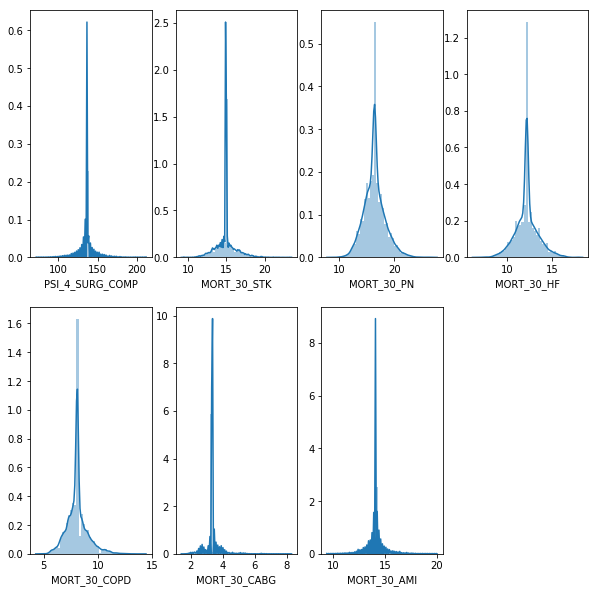

In [96]:
#Checking the distribution of values for each column in mortality data set before quantile transformation

plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
sns.distplot(Mortality_pivot['PSI_4_SURG_COMP'])
plt.subplot(2,4,2)
sns.distplot(Mortality_pivot['MORT_30_STK'])
plt.subplot(2,4,3)
sns.distplot(Mortality_pivot['MORT_30_PN'])
plt.subplot(2,4,4)
sns.distplot(Mortality_pivot['MORT_30_HF'])
plt.subplot(2,4,5)
sns.distplot(Mortality_pivot['MORT_30_COPD'])
plt.subplot(2,4,6)
sns.distplot(Mortality_pivot['MORT_30_CABG'])
plt.subplot(2,4,7)
sns.distplot(Mortality_pivot['MORT_30_AMI'])

plt.show()

### Handling Measure directions(positive vs negative) in Quantile Transformation by multiplying with '-1'

In [97]:
#Tranforming the distribution of attributes to normal using Quantile Transformer
Mortality_pivot[['PSI_4_SURG_COMP','MORT_30_STK','MORT_30_PN','MORT_30_HF','MORT_30_COPD','MORT_30_CABG','MORT_30_AMI']]=-1*qnt.fit_transform(Mortality_pivot[['PSI_4_SURG_COMP','MORT_30_STK','MORT_30_PN','MORT_30_HF','MORT_30_COPD','MORT_30_CABG','MORT_30_AMI']])

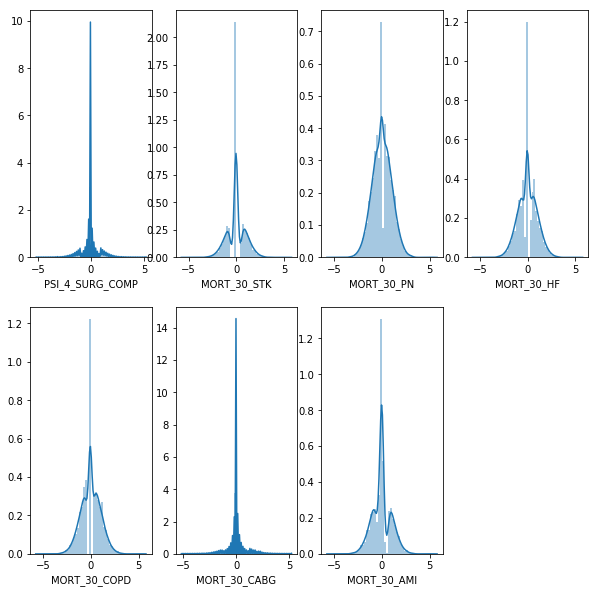

In [98]:
#Checking the distribution of values for each column in mortality data set after quantile transformation

plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
sns.distplot(Mortality_pivot['PSI_4_SURG_COMP'])
plt.subplot(2,4,2)
sns.distplot(Mortality_pivot['MORT_30_STK'])
plt.subplot(2,4,3)
sns.distplot(Mortality_pivot['MORT_30_PN'])
plt.subplot(2,4,4)
sns.distplot(Mortality_pivot['MORT_30_HF'])
plt.subplot(2,4,5)
sns.distplot(Mortality_pivot['MORT_30_COPD'])
plt.subplot(2,4,6)
sns.distplot(Mortality_pivot['MORT_30_CABG'])
plt.subplot(2,4,7)
sns.distplot(Mortality_pivot['MORT_30_AMI'])

plt.show()

#### Outlier verification

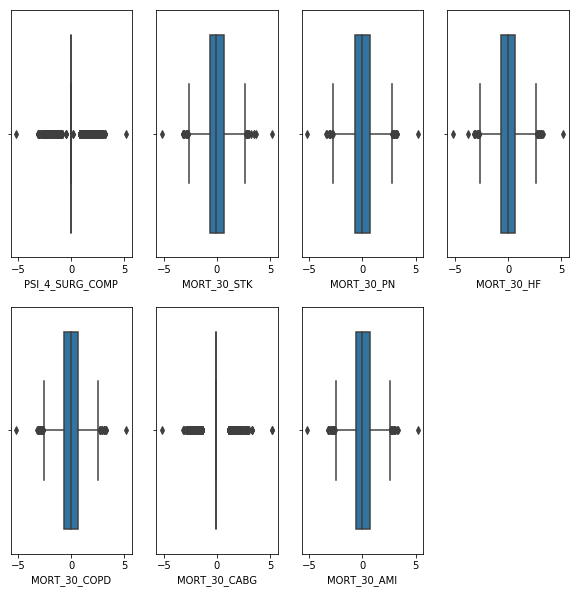

In [99]:
plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
sns.boxplot(Mortality_pivot['PSI_4_SURG_COMP'])
plt.subplot(2,4,2)
sns.boxplot(Mortality_pivot['MORT_30_STK'])
plt.subplot(2,4,3)
sns.boxplot(Mortality_pivot['MORT_30_PN'])
plt.subplot(2,4,4)
sns.boxplot(Mortality_pivot['MORT_30_HF'])
plt.subplot(2,4,5)
sns.boxplot(Mortality_pivot['MORT_30_COPD'])
plt.subplot(2,4,6)
sns.boxplot(Mortality_pivot['MORT_30_CABG'])
plt.subplot(2,4,7)
sns.boxplot(Mortality_pivot['MORT_30_AMI'])

plt.show()

In [100]:
null_summary(Readmission_pivot)

,null_count,null_percentage
Measure ID,,
READM_30_CABG,3791.0,78.68
READM_30_AMI,2655.0,55.11
READM_30_STK,2210.0,45.87
READM_30_HIP_KNEE,2087.0,43.32
READM_30_COPD,1170.0,24.28
READM_30_HF,1168.0,24.24
READM_30_PN,729.0,15.13
READM_30_HOSP_WIDE,423.0,8.78


In [101]:
#Imputing missiong values in the Readmission data frame with the mean
Readmission_pivot = Readmission_pivot.apply(pd.to_numeric, errors='coerce')
Readmission_pivot=Readmission_pivot.fillna(Readmission_pivot.mean())

In [102]:
null_summary(Readmission_pivot)

,null_count,null_percentage
Measure ID,,
READM_30_AMI,0.0,0.0
READM_30_CABG,0.0,0.0
READM_30_COPD,0.0,0.0
READM_30_HF,0.0,0.0
READM_30_HIP_KNEE,0.0,0.0
READM_30_HOSP_WIDE,0.0,0.0
READM_30_PN,0.0,0.0
READM_30_STK,0.0,0.0


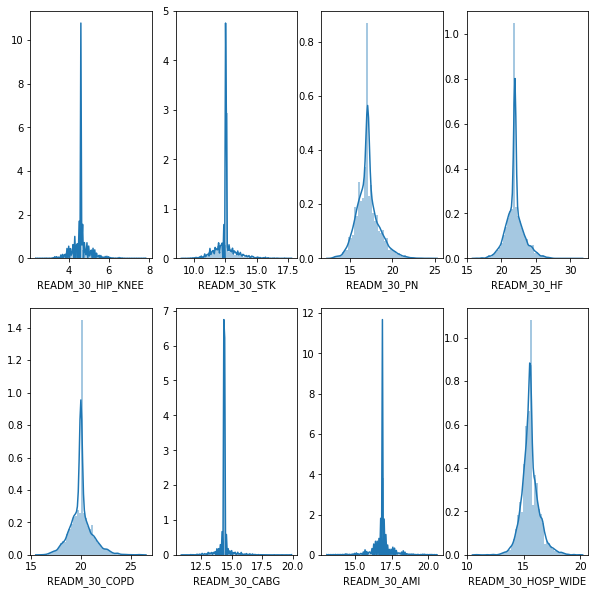

In [103]:
#Checking the distribution of values for each column in Readmission data set before quantile transformation

plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
sns.distplot(Readmission_pivot['READM_30_HIP_KNEE'])
plt.subplot(2,4,2)
sns.distplot(Readmission_pivot['READM_30_STK'])
plt.subplot(2,4,3)
sns.distplot(Readmission_pivot['READM_30_PN'])
plt.subplot(2,4,4)
sns.distplot(Readmission_pivot['READM_30_HF'])
plt.subplot(2,4,5)
sns.distplot(Readmission_pivot['READM_30_COPD'])
plt.subplot(2,4,6)
sns.distplot(Readmission_pivot['READM_30_CABG'])
plt.subplot(2,4,7)
sns.distplot(Readmission_pivot['READM_30_AMI'])
plt.subplot(2,4,8)
sns.distplot(Readmission_pivot['READM_30_HOSP_WIDE'])

plt.show()

In [104]:
#Tranforming the distribution of attributes to normal using Quantile Transformer
Readmission_pivot[['READM_30_HIP_KNEE','READM_30_STK','READM_30_PN','READM_30_HF','READM_30_COPD','READM_30_CABG','READM_30_AMI','READM_30_HOSP_WIDE']]=-1*qnt.fit_transform(Readmission_pivot[['READM_30_HIP_KNEE','READM_30_STK','READM_30_PN','READM_30_HF','READM_30_COPD','READM_30_CABG','READM_30_AMI','READM_30_HOSP_WIDE']])

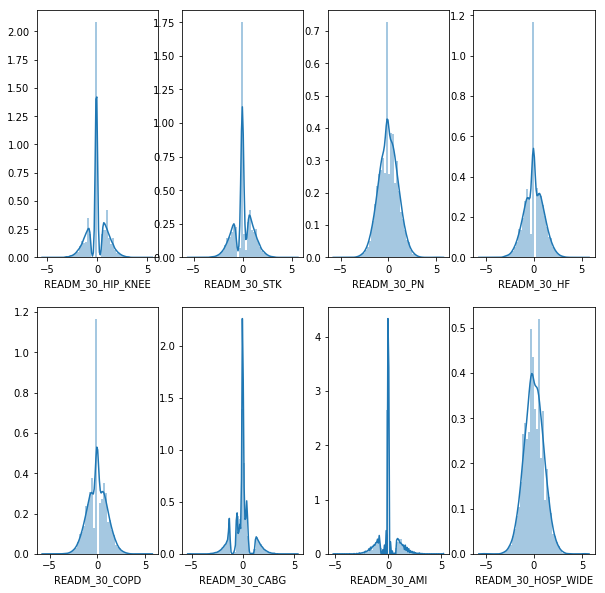

In [105]:
#Checking the distribution of values for each column in Readmission data set after quantile transformation

plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
sns.distplot(Readmission_pivot['READM_30_HIP_KNEE'])
plt.subplot(2,4,2)
sns.distplot(Readmission_pivot['READM_30_STK'])
plt.subplot(2,4,3)
sns.distplot(Readmission_pivot['READM_30_PN'])
plt.subplot(2,4,4)
sns.distplot(Readmission_pivot['READM_30_HF'])
plt.subplot(2,4,5)
sns.distplot(Readmission_pivot['READM_30_COPD'])
plt.subplot(2,4,6)
sns.distplot(Readmission_pivot['READM_30_CABG'])
plt.subplot(2,4,7)
sns.distplot(Readmission_pivot['READM_30_AMI'])
plt.subplot(2,4,8)
sns.distplot(Readmission_pivot['READM_30_HOSP_WIDE'])

plt.show()

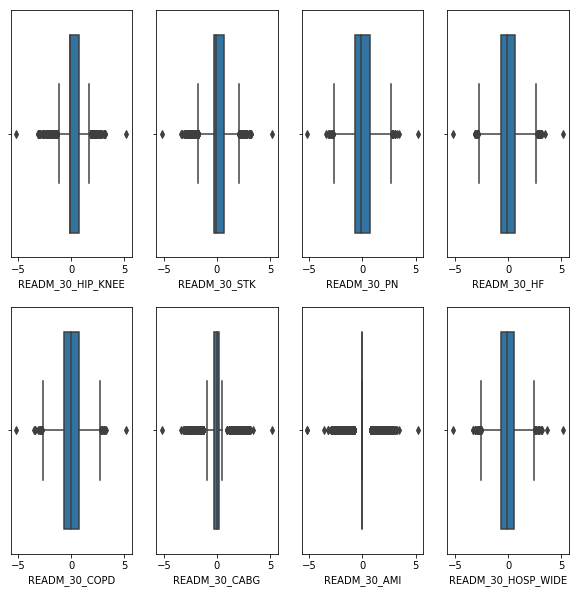

In [106]:
plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
sns.boxplot(Readmission_pivot['READM_30_HIP_KNEE'])
plt.subplot(2,4,2)
sns.boxplot(Readmission_pivot['READM_30_STK'])
plt.subplot(2,4,3)
sns.boxplot(Readmission_pivot['READM_30_PN'])
plt.subplot(2,4,4)
sns.boxplot(Readmission_pivot['READM_30_HF'])
plt.subplot(2,4,5)
sns.boxplot(Readmission_pivot['READM_30_COPD'])
plt.subplot(2,4,6)
sns.boxplot(Readmission_pivot['READM_30_CABG'])
plt.subplot(2,4,7)
sns.boxplot(Readmission_pivot['READM_30_AMI'])
plt.subplot(2,4,8)
sns.boxplot(Readmission_pivot['READM_30_HOSP_WIDE'])

plt.show()

In [107]:
null_summary(Effective_care_pivot)

,null_count,null_percentage
Measure ID,,
CAC_3,4643.0,96.37
STK_4,3919.0,81.34
OP_23,3608.0,74.89
VTE_6,3560.0,73.89
OP_4,2599.0,53.94
VTE_5,2587.0,53.69
STK_8,2454.0,50.93
VTE_3,2332.0,48.40
PC_01,2296.0,47.65


In [108]:
# Dropping CAC_3,STK_4 measures as these measure are having above 80% of null values..
Effective_care_pivot=Effective_care_pivot.drop(['CAC_3','STK_4'],axis=1)

In [109]:
#Imputing missiong values in the effective care data frame with the mean
Effective_care_pivot = Effective_care_pivot.apply(pd.to_numeric, errors='coerce')
Effective_care_pivot=Effective_care_pivot.fillna(Effective_care_pivot.mean())

In [110]:
null_summary(Effective_care_pivot)

,null_count,null_percentage
Measure ID,,
IMM_2,0.0,0.0
IMM_3_OP_27_FAC_ADHPCT,0.0,0.0
OP_22,0.0,0.0
OP_23,0.0,0.0
OP_29,0.0,0.0
OP_30,0.0,0.0
OP_4,0.0,0.0
PC_01,0.0,0.0
STK_1,0.0,0.0


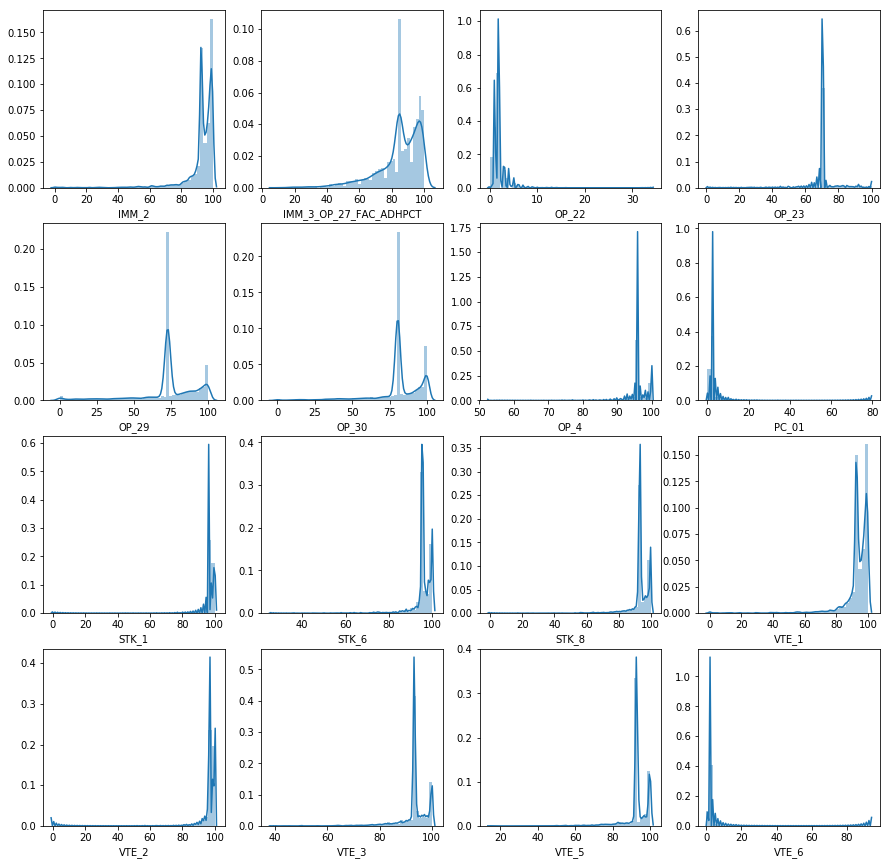

In [111]:
#Checking the distribution of values for each column in Effective care data set before quantile transformation

plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.distplot(Effective_care_pivot['IMM_2'])
plt.subplot(4,4,2)
sns.distplot(Effective_care_pivot['IMM_3_OP_27_FAC_ADHPCT'])
plt.subplot(4,4,3)
sns.distplot(Effective_care_pivot['OP_22'])
plt.subplot(4,4,4)
sns.distplot(Effective_care_pivot['OP_23'])
plt.subplot(4,4,5)
sns.distplot(Effective_care_pivot['OP_29'])
plt.subplot(4,4,6)
sns.distplot(Effective_care_pivot['OP_30'])
plt.subplot(4,4,7)
sns.distplot(Effective_care_pivot['OP_4'])
plt.subplot(4,4,8)
sns.distplot(Effective_care_pivot['PC_01'])
plt.subplot(4,4,9)
sns.distplot(Effective_care_pivot['STK_1'])
plt.subplot(4,4,10)
sns.distplot(Effective_care_pivot['STK_6'])
plt.subplot(4,4,11)
sns.distplot(Effective_care_pivot['STK_8'])
plt.subplot(4,4,12)
sns.distplot(Effective_care_pivot['VTE_1'])
plt.subplot(4,4,13)
sns.distplot(Effective_care_pivot['VTE_2'])
plt.subplot(4,4,14)
sns.distplot(Effective_care_pivot['VTE_3'])
plt.subplot(4,4,15)
sns.distplot(Effective_care_pivot['VTE_5'])
plt.subplot(4,4,16)
sns.distplot(Effective_care_pivot['VTE_6'])

plt.show()

In [112]:
#Tranforming the distribution of attributes to normal using Quantile Transformer
Effective_care_pivot[['IMM_2','IMM_3_OP_27_FAC_ADHPCT','OP_22','OP_23','OP_29','OP_30','OP_4','PC_01','STK_1','STK_6','STK_8','VTE_1','VTE_2','VTE_3','VTE_5','VTE_6']]=-1*qnt.fit_transform(Effective_care_pivot[['IMM_2','IMM_3_OP_27_FAC_ADHPCT','OP_22','OP_23','OP_29','OP_30','OP_4','PC_01','STK_1','STK_6','STK_8','VTE_1','VTE_2','VTE_3','VTE_5','VTE_6']])

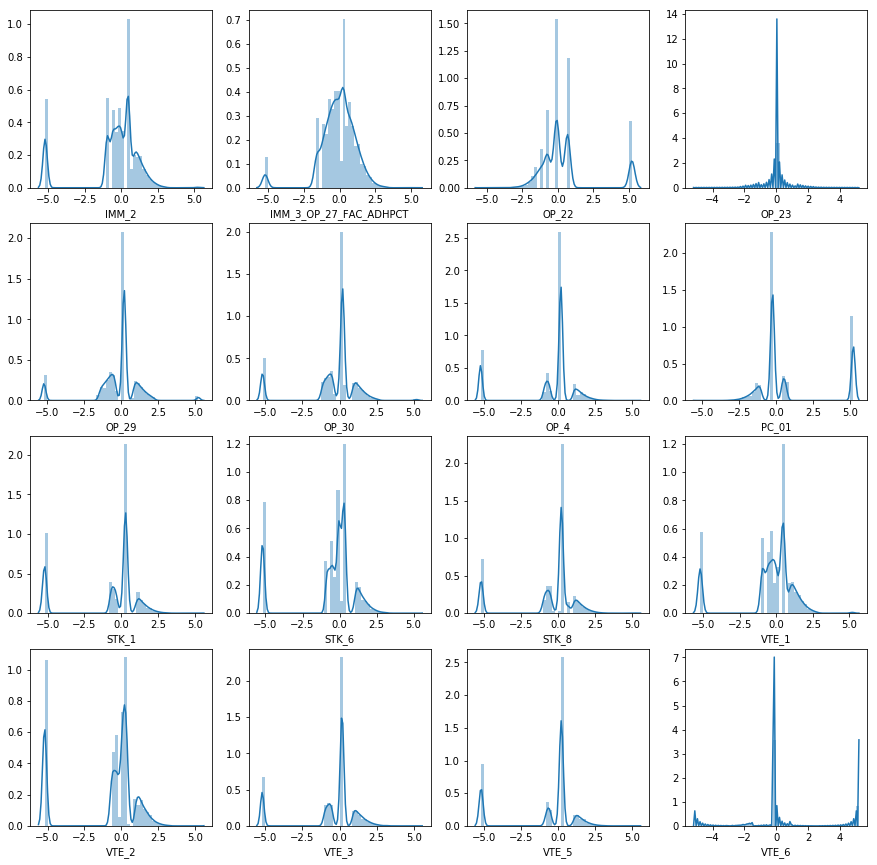

In [113]:
#Checking the distribution of values for each column in Effective Care data set after quantile transformation

plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.distplot(Effective_care_pivot['IMM_2'])
plt.subplot(4,4,2)
sns.distplot(Effective_care_pivot['IMM_3_OP_27_FAC_ADHPCT'])
plt.subplot(4,4,3)
sns.distplot(Effective_care_pivot['OP_22'])
plt.subplot(4,4,4)
sns.distplot(Effective_care_pivot['OP_23'])
plt.subplot(4,4,5)
sns.distplot(Effective_care_pivot['OP_29'])
plt.subplot(4,4,6)
sns.distplot(Effective_care_pivot['OP_30'])
plt.subplot(4,4,7)
sns.distplot(Effective_care_pivot['OP_4'])
plt.subplot(4,4,8)
sns.distplot(Effective_care_pivot['PC_01'])
plt.subplot(4,4,9)
sns.distplot(Effective_care_pivot['STK_1'])
plt.subplot(4,4,10)
sns.distplot(Effective_care_pivot['STK_6'])
plt.subplot(4,4,11)
sns.distplot(Effective_care_pivot['STK_8'])
plt.subplot(4,4,12)
sns.distplot(Effective_care_pivot['VTE_1'])
plt.subplot(4,4,13)
sns.distplot(Effective_care_pivot['VTE_2'])
plt.subplot(4,4,14)
sns.distplot(Effective_care_pivot['VTE_3'])
plt.subplot(4,4,15)
sns.distplot(Effective_care_pivot['VTE_5'])
plt.subplot(4,4,16)
sns.distplot(Effective_care_pivot['VTE_6'])

plt.show()

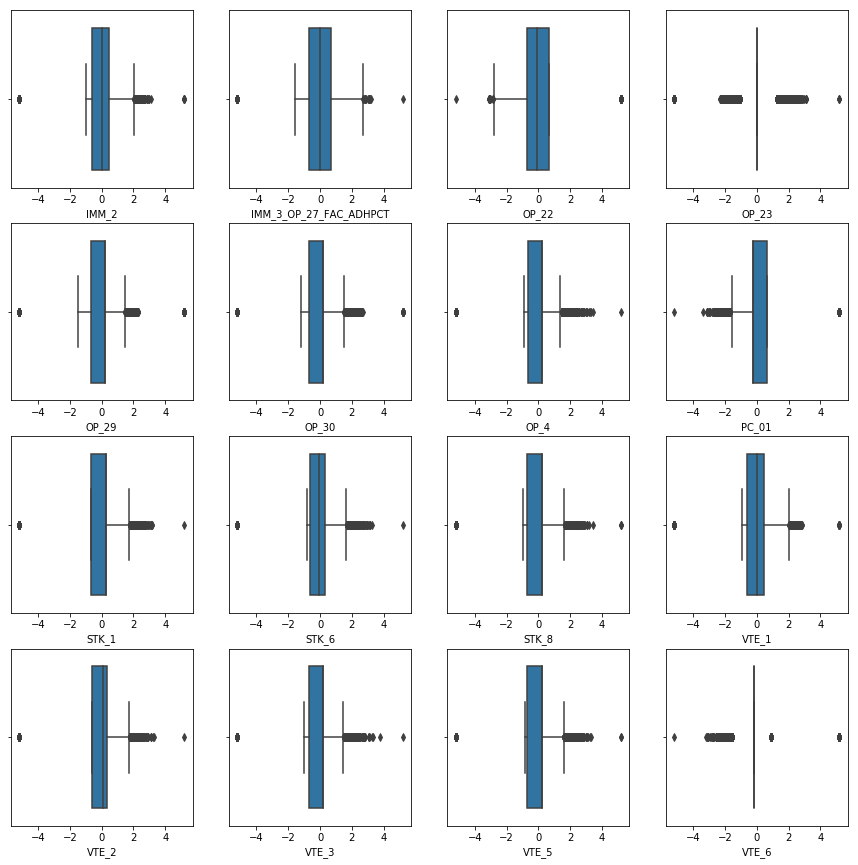

In [114]:
plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.boxplot(Effective_care_pivot['IMM_2'])
plt.subplot(4,4,2)
sns.boxplot(Effective_care_pivot['IMM_3_OP_27_FAC_ADHPCT'])
plt.subplot(4,4,3)
sns.boxplot(Effective_care_pivot['OP_22'])
plt.subplot(4,4,4)
sns.boxplot(Effective_care_pivot['OP_23'])
plt.subplot(4,4,5)
sns.boxplot(Effective_care_pivot['OP_29'])
plt.subplot(4,4,6)
sns.boxplot(Effective_care_pivot['OP_30'])
plt.subplot(4,4,7)
sns.boxplot(Effective_care_pivot['OP_4'])
plt.subplot(4,4,8)
sns.boxplot(Effective_care_pivot['PC_01'])
plt.subplot(4,4,9)
sns.boxplot(Effective_care_pivot['STK_1'])
plt.subplot(4,4,10)
sns.boxplot(Effective_care_pivot['STK_6'])
plt.subplot(4,4,11)
sns.boxplot(Effective_care_pivot['STK_8'])
plt.subplot(4,4,12)
sns.boxplot(Effective_care_pivot['VTE_1'])
plt.subplot(4,4,13)
sns.boxplot(Effective_care_pivot['VTE_2'])
plt.subplot(4,4,14)
sns.boxplot(Effective_care_pivot['VTE_3'])
plt.subplot(4,4,15)
sns.boxplot(Effective_care_pivot['VTE_5'])
plt.subplot(4,4,16)
sns.boxplot(Effective_care_pivot['VTE_6'])

plt.show()

In [115]:
null_summary(Timely_care_pivot)

,null_count,null_percentage
Measure ID,,
OP_3b,4425.0,91.84
OP_5,2574.0,53.42
OP_21,1505.0,31.24
ED_2b,1238.0,25.70
OP_18b,1234.0,25.61
OP_20,1223.0,25.38
ED_1b,1222.0,25.36


In [116]:
# Dropping OP_3b measure as the measure is having above 80% of null values.
Timely_care_pivot=Timely_care_pivot.drop(['OP_3b'],axis=1)

In [117]:
#Imputing missiong values in the Timely care data frame with the mean
Timely_care_pivot = Timely_care_pivot.apply(pd.to_numeric, errors='coerce')
Timely_care_pivot = Timely_care_pivot.fillna(Timely_care_pivot.mean())

In [118]:
null_summary(Timely_care_pivot)

,null_count,null_percentage
Measure ID,,
ED_1b,0.0,0.0
ED_2b,0.0,0.0
OP_18b,0.0,0.0
OP_20,0.0,0.0
OP_21,0.0,0.0
OP_5,0.0,0.0


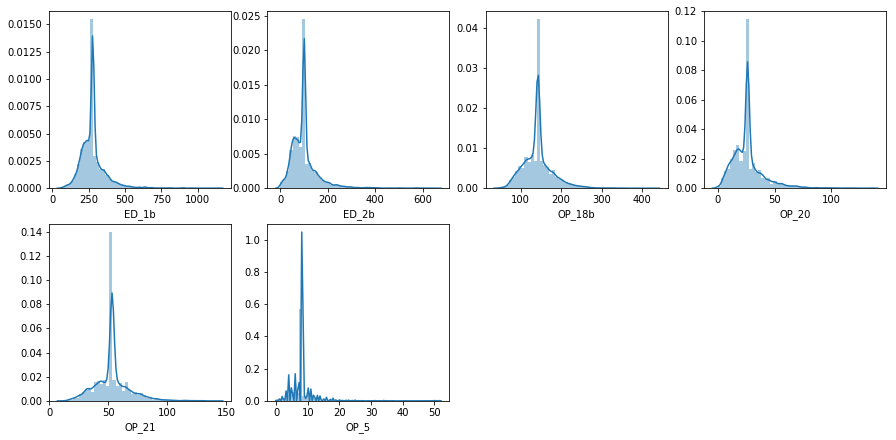

In [119]:
#Checking the distribution of values for each column in Timely care data set before quantile transformation

plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.distplot(Timely_care_pivot['ED_1b'])
plt.subplot(4,4,2)
sns.distplot(Timely_care_pivot['ED_2b'])
plt.subplot(4,4,3)
sns.distplot(Timely_care_pivot['OP_18b'])
plt.subplot(4,4,4)
sns.distplot(Timely_care_pivot['OP_20'])
plt.subplot(4,4,5)
sns.distplot(Timely_care_pivot['OP_21'])
plt.subplot(4,4,6)
sns.distplot(Timely_care_pivot['OP_5'])

plt.show()

In [120]:
#Tranforming the distribution of attributes to normal using Quantile Transformer
Timely_care_pivot[['ED_1b','ED_2b','OP_18b','OP_20','OP_21','OP_5']]=-1*qnt.fit_transform(Timely_care_pivot[['ED_1b','ED_2b','OP_18b','OP_20','OP_21','OP_5']])

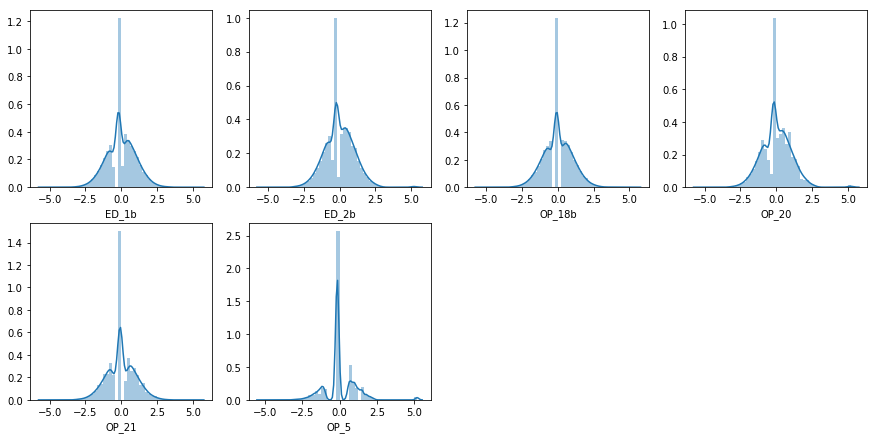

In [121]:
#Checking the distribution of values for each column in Timely Care data set after quantile transformation

plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.distplot(Timely_care_pivot['ED_1b'])
plt.subplot(4,4,2)
sns.distplot(Timely_care_pivot['ED_2b'])
plt.subplot(4,4,3)
sns.distplot(Timely_care_pivot['OP_18b'])
plt.subplot(4,4,4)
sns.distplot(Timely_care_pivot['OP_20'])
plt.subplot(4,4,5)
sns.distplot(Timely_care_pivot['OP_21'])
plt.subplot(4,4,6)
sns.distplot(Timely_care_pivot['OP_5'])


plt.show()

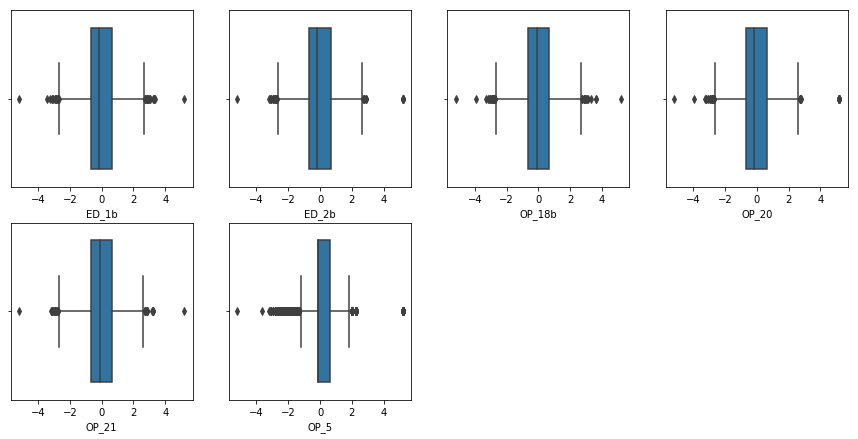

In [122]:
plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.boxplot(Timely_care_pivot['ED_1b'])
plt.subplot(4,4,2)
sns.boxplot(Timely_care_pivot['ED_2b'])
plt.subplot(4,4,3)
sns.boxplot(Timely_care_pivot['OP_18b'])
plt.subplot(4,4,4)
sns.boxplot(Timely_care_pivot['OP_20'])
plt.subplot(4,4,5)
sns.boxplot(Timely_care_pivot['OP_21'])
plt.subplot(4,4,6)
sns.boxplot(Timely_care_pivot['OP_5'])


plt.show()

In [123]:
null_summary(imaging_pivot)

,null_count,null_percentage
Measure ID,,
OP_8,3294.0,68.37
OP_13,2585.0,53.65
OP_14,2514.0,52.18
OP_11,1469.0,30.49
OP_10,1189.0,24.68


In [124]:
#Imputing missiong values in the imaging data frame with the mean
imaging_pivot = imaging_pivot.apply(pd.to_numeric, errors='coerce')
imaging_pivot = imaging_pivot.fillna(imaging_pivot.mean())

In [125]:
null_summary(imaging_pivot)

,null_count,null_percentage
Measure ID,,
OP_10,0.0,0.0
OP_11,0.0,0.0
OP_13,0.0,0.0
OP_14,0.0,0.0
OP_8,0.0,0.0


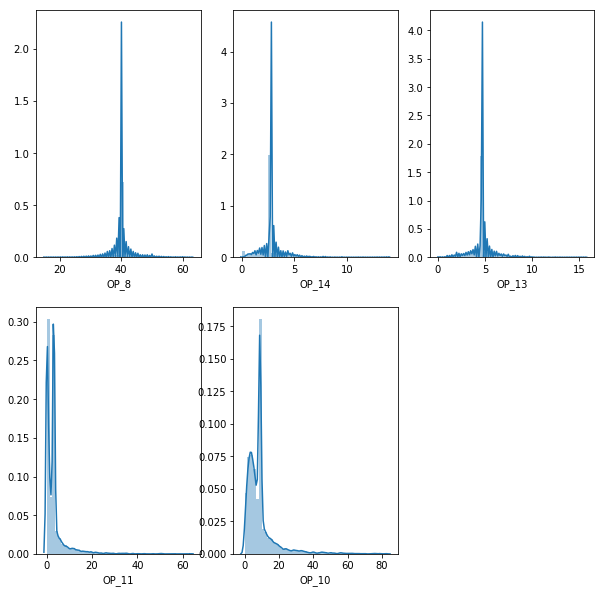

In [126]:
#Checking the distribution of values for each column in Imaging data set before quantile transformation
plt.figure(figsize=(10, 10))
plt.subplot(2,3,1)
sns.distplot(imaging_pivot['OP_8'])
plt.subplot(2,3,2)
sns.distplot(imaging_pivot['OP_14'])
plt.subplot(2,3,3)
sns.distplot(imaging_pivot['OP_13'])
plt.subplot(2,3,4)
sns.distplot(imaging_pivot['OP_11'])
plt.subplot(2,3,5)
sns.distplot(imaging_pivot['OP_10'])


plt.show()

In [127]:
#Tranforming the distribution of attributes to normal using Quantile Transformer
imaging_pivot[['OP_8','OP_14','OP_13','OP_11','OP_10']]=-1*qnt.fit_transform(imaging_pivot[['OP_8','OP_14','OP_13','OP_11','OP_10']])

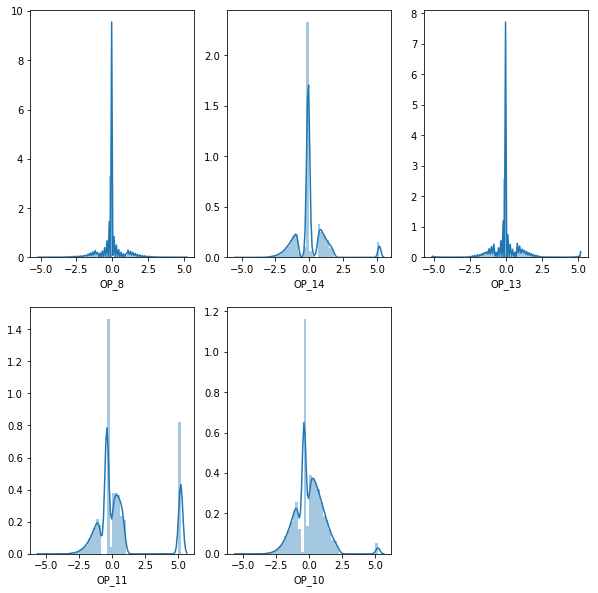

In [128]:
#Checking the distribution of values for each column in Imaging data set after quantile transformation
plt.figure(figsize=(10, 10))
plt.subplot(2,3,1)
sns.distplot(imaging_pivot['OP_8'])
plt.subplot(2,3,2)
sns.distplot(imaging_pivot['OP_14'])
plt.subplot(2,3,3)
sns.distplot(imaging_pivot['OP_13'])
plt.subplot(2,3,4)
sns.distplot(imaging_pivot['OP_11'])
plt.subplot(2,3,5)
sns.distplot(imaging_pivot['OP_10'])


plt.show()

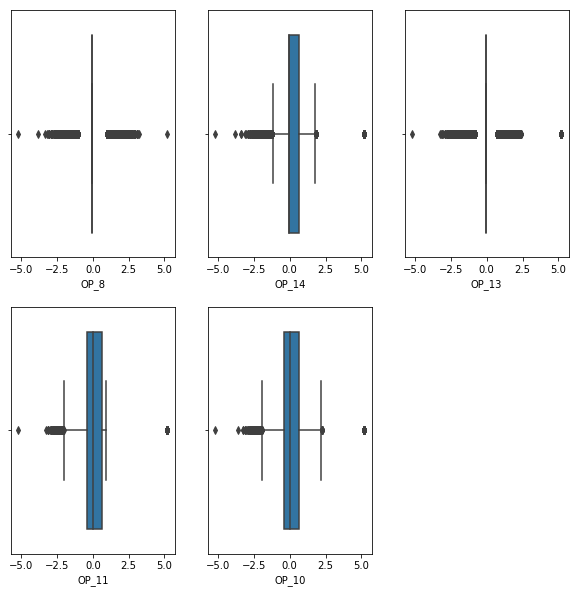

In [129]:
plt.figure(figsize=(10, 10))
plt.subplot(2,3,1)
sns.boxplot(imaging_pivot['OP_8'])
plt.subplot(2,3,2)
sns.boxplot(imaging_pivot['OP_14'])
plt.subplot(2,3,3)
sns.boxplot(imaging_pivot['OP_13'])
plt.subplot(2,3,4)
sns.boxplot(imaging_pivot['OP_11'])
plt.subplot(2,3,5)
sns.boxplot(imaging_pivot['OP_10'])


plt.show()

In [130]:
null_summary(Safety_care_pivot)

,null_count,null_percentage
Measure ID,,
HAI_4_SIR,3962.0,82.23
HAI_5_SIR,2988.0,62.02
HAI_3_SIR,2775.0,57.60
HAI_1_SIR,2443.0,50.71
COMP_HIP_KNEE,2104.0,43.67
HAI_2_SIR,1929.0,40.04
PSI_90_SAFETY,1594.0,33.08
HAI_6_SIR,1546.0,32.09


In [131]:
# Dropping HAI_4_SIR measure as the measure is having above 80% of null values.
Safety_care_pivot=Safety_care_pivot.drop(['HAI_4_SIR'],axis=1)

In [132]:
#Imputing missiong values in the Safety Care data frame with the mean
Safety_care_pivot = Safety_care_pivot.apply(pd.to_numeric, errors='coerce')
Safety_care_pivot = Safety_care_pivot.fillna(Safety_care_pivot.mean())

In [133]:
null_summary(Safety_care_pivot)

,null_count,null_percentage
Measure ID,,
COMP_HIP_KNEE,0.0,0.0
HAI_1_SIR,0.0,0.0
HAI_2_SIR,0.0,0.0
HAI_3_SIR,0.0,0.0
HAI_5_SIR,0.0,0.0
HAI_6_SIR,0.0,0.0
PSI_90_SAFETY,0.0,0.0


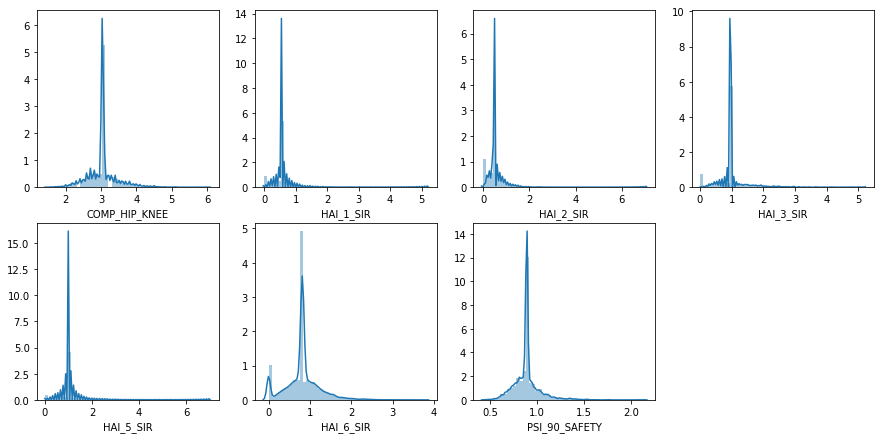

In [134]:
#Checking the distribution of values for each column in Safety care data set before quantile transformation

plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.distplot(Safety_care_pivot['COMP_HIP_KNEE'])
plt.subplot(4,4,2)
sns.distplot(Safety_care_pivot['HAI_1_SIR'])
plt.subplot(4,4,3)
sns.distplot(Safety_care_pivot['HAI_2_SIR'])
plt.subplot(4,4,4)
sns.distplot(Safety_care_pivot['HAI_3_SIR'])
plt.subplot(4,4,5)
sns.distplot(Safety_care_pivot['HAI_5_SIR'])
plt.subplot(4,4,6)
sns.distplot(Safety_care_pivot['HAI_6_SIR'])
plt.subplot(4,4,7)
sns.distplot(Safety_care_pivot['PSI_90_SAFETY'])

plt.show()

In [135]:
#Tranforming the distribution of attributes to normal using Quantile Transformer
Safety_care_pivot[['COMP_HIP_KNEE','HAI_1_SIR','HAI_2_SIR','HAI_3_SIR','HAI_5_SIR','HAI_6_SIR','PSI_90_SAFETY']]=-1*qnt.fit_transform(Safety_care_pivot[['COMP_HIP_KNEE','HAI_1_SIR','HAI_2_SIR','HAI_3_SIR','HAI_5_SIR','HAI_6_SIR','PSI_90_SAFETY']])

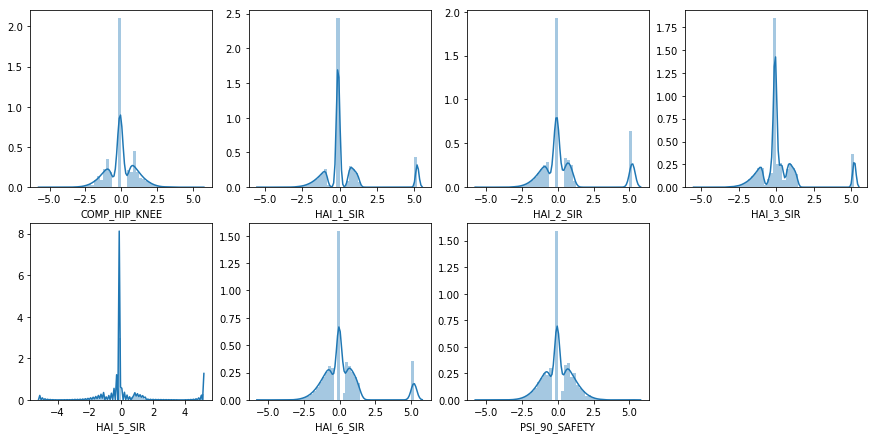

In [136]:
#Checking the distribution of values for each column in Safety Care data set after quantile transformation

plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.distplot(Safety_care_pivot['COMP_HIP_KNEE'])
plt.subplot(4,4,2)
sns.distplot(Safety_care_pivot['HAI_1_SIR'])
plt.subplot(4,4,3)
sns.distplot(Safety_care_pivot['HAI_2_SIR'])
plt.subplot(4,4,4)
sns.distplot(Safety_care_pivot['HAI_3_SIR'])
plt.subplot(4,4,5)
sns.distplot(Safety_care_pivot['HAI_5_SIR'])
plt.subplot(4,4,6)
sns.distplot(Safety_care_pivot['HAI_6_SIR'])
plt.subplot(4,4,7)
sns.distplot(Safety_care_pivot['PSI_90_SAFETY'])

plt.show()

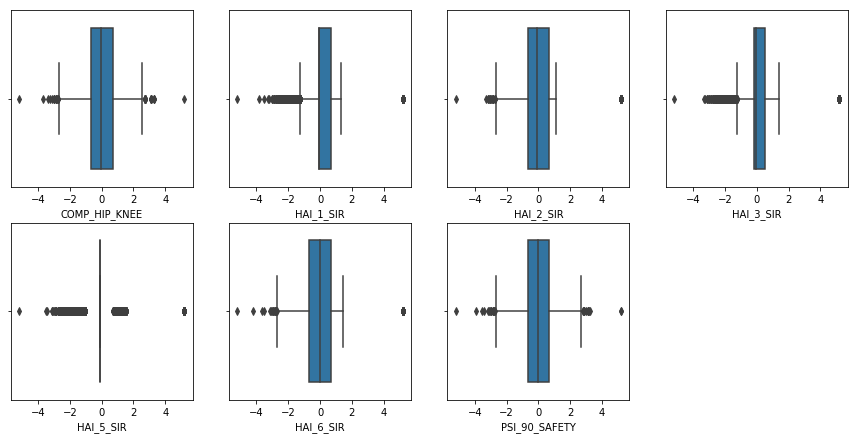

In [137]:
plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.boxplot(Safety_care_pivot['COMP_HIP_KNEE'])
plt.subplot(4,4,2)
sns.boxplot(Safety_care_pivot['HAI_1_SIR'])
plt.subplot(4,4,3)
sns.boxplot(Safety_care_pivot['HAI_2_SIR'])
plt.subplot(4,4,4)
sns.boxplot(Safety_care_pivot['HAI_3_SIR'])
plt.subplot(4,4,5)
sns.boxplot(Safety_care_pivot['HAI_5_SIR'])
plt.subplot(4,4,6)
sns.boxplot(Safety_care_pivot['HAI_6_SIR'])
plt.subplot(4,4,7)
sns.boxplot(Safety_care_pivot['PSI_90_SAFETY'])

plt.show()

In [138]:
null_summary(patient_experience_pivot)

,null_count,null_percentage
HCAHPS Measure ID,,
H_CLEAN_LINEAR_SCORE,1310.0,27.19
H_COMP_1_LINEAR_SCORE,1310.0,27.19
H_COMP_2_LINEAR_SCORE,1310.0,27.19
H_COMP_3_LINEAR_SCORE,1310.0,27.19
H_COMP_4_LINEAR_SCORE,1310.0,27.19
H_COMP_5_LINEAR_SCORE,1310.0,27.19
H_COMP_6_LINEAR_SCORE,1310.0,27.19
H_COMP_7_LINEAR_SCORE,1310.0,27.19
H_HSP_RATING_LINEAR_SCORE,1310.0,27.19


In [139]:
#Imputing missiong values in the Patient experience data frame with the mean
patient_experience_pivot = patient_experience_pivot.apply(pd.to_numeric, errors='coerce')
patient_experience_pivot = patient_experience_pivot.fillna(patient_experience_pivot.mean())

In [140]:
null_summary(patient_experience_pivot)

,null_count,null_percentage
HCAHPS Measure ID,,
H_CLEAN_LINEAR_SCORE,0.0,0.0
H_COMP_1_LINEAR_SCORE,0.0,0.0
H_COMP_2_LINEAR_SCORE,0.0,0.0
H_COMP_3_LINEAR_SCORE,0.0,0.0
H_COMP_4_LINEAR_SCORE,0.0,0.0
H_COMP_5_LINEAR_SCORE,0.0,0.0
H_COMP_6_LINEAR_SCORE,0.0,0.0
H_COMP_7_LINEAR_SCORE,0.0,0.0
H_HSP_RATING_LINEAR_SCORE,0.0,0.0


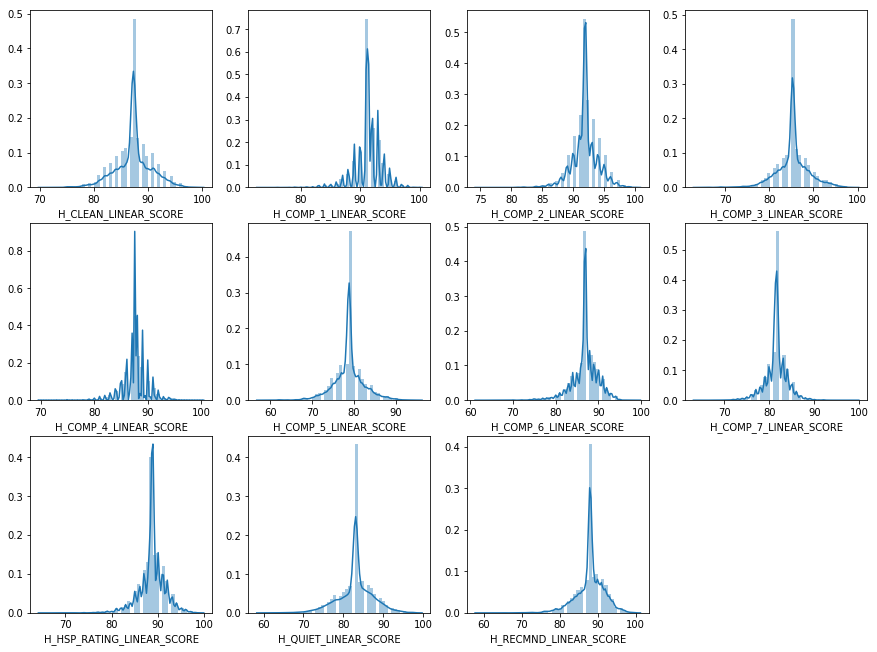

In [141]:
#Checking the distribution of values for each column in patient experience data set before quantile transformation

plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.distplot(patient_experience_pivot['H_CLEAN_LINEAR_SCORE'])
plt.subplot(4,4,2)
sns.distplot(patient_experience_pivot['H_COMP_1_LINEAR_SCORE'])
plt.subplot(4,4,3)
sns.distplot(patient_experience_pivot['H_COMP_2_LINEAR_SCORE'])
plt.subplot(4,4,4)
sns.distplot(patient_experience_pivot['H_COMP_3_LINEAR_SCORE'])
plt.subplot(4,4,5)
sns.distplot(patient_experience_pivot['H_COMP_4_LINEAR_SCORE'])
plt.subplot(4,4,6)
sns.distplot(patient_experience_pivot['H_COMP_5_LINEAR_SCORE'])
plt.subplot(4,4,7)
sns.distplot(patient_experience_pivot['H_COMP_6_LINEAR_SCORE'])
plt.subplot(4,4,8)
sns.distplot(patient_experience_pivot['H_COMP_7_LINEAR_SCORE'])
plt.subplot(4,4,9)
sns.distplot(patient_experience_pivot['H_HSP_RATING_LINEAR_SCORE'])
plt.subplot(4,4,10)
sns.distplot(patient_experience_pivot['H_QUIET_LINEAR_SCORE'])
plt.subplot(4,4,11)
sns.distplot(patient_experience_pivot['H_RECMND_LINEAR_SCORE'])

plt.show()

In [142]:
#Tranforming the distribution of attributes to normal using Quantile Transformer
patient_experience_pivot[['H_CLEAN_LINEAR_SCORE','H_COMP_1_LINEAR_SCORE','H_COMP_2_LINEAR_SCORE','H_COMP_3_LINEAR_SCORE','H_COMP_4_LINEAR_SCORE','H_COMP_5_LINEAR_SCORE','H_COMP_6_LINEAR_SCORE','H_COMP_7_LINEAR_SCORE','H_HSP_RATING_LINEAR_SCORE','H_QUIET_LINEAR_SCORE','H_RECMND_LINEAR_SCORE']]=-1*qnt.fit_transform(patient_experience_pivot[['H_CLEAN_LINEAR_SCORE','H_COMP_1_LINEAR_SCORE','H_COMP_2_LINEAR_SCORE','H_COMP_3_LINEAR_SCORE','H_COMP_4_LINEAR_SCORE','H_COMP_5_LINEAR_SCORE','H_COMP_6_LINEAR_SCORE','H_COMP_7_LINEAR_SCORE','H_HSP_RATING_LINEAR_SCORE','H_QUIET_LINEAR_SCORE','H_RECMND_LINEAR_SCORE']])

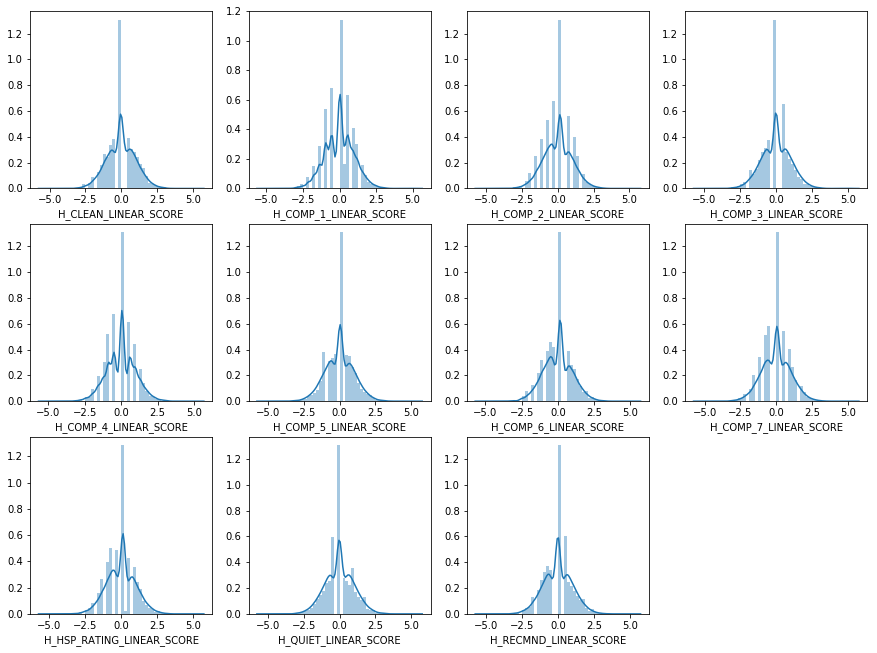

In [143]:
#Checking the distribution of values for each column in patient experience data set after quantile transformation

plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.distplot(patient_experience_pivot['H_CLEAN_LINEAR_SCORE'])
plt.subplot(4,4,2)
sns.distplot(patient_experience_pivot['H_COMP_1_LINEAR_SCORE'])
plt.subplot(4,4,3)
sns.distplot(patient_experience_pivot['H_COMP_2_LINEAR_SCORE'])
plt.subplot(4,4,4)
sns.distplot(patient_experience_pivot['H_COMP_3_LINEAR_SCORE'])
plt.subplot(4,4,5)
sns.distplot(patient_experience_pivot['H_COMP_4_LINEAR_SCORE'])
plt.subplot(4,4,6)
sns.distplot(patient_experience_pivot['H_COMP_5_LINEAR_SCORE'])
plt.subplot(4,4,7)
sns.distplot(patient_experience_pivot['H_COMP_6_LINEAR_SCORE'])
plt.subplot(4,4,8)
sns.distplot(patient_experience_pivot['H_COMP_7_LINEAR_SCORE'])
plt.subplot(4,4,9)
sns.distplot(patient_experience_pivot['H_HSP_RATING_LINEAR_SCORE'])
plt.subplot(4,4,10)
sns.distplot(patient_experience_pivot['H_QUIET_LINEAR_SCORE'])
plt.subplot(4,4,11)
sns.distplot(patient_experience_pivot['H_RECMND_LINEAR_SCORE'])

plt.show()

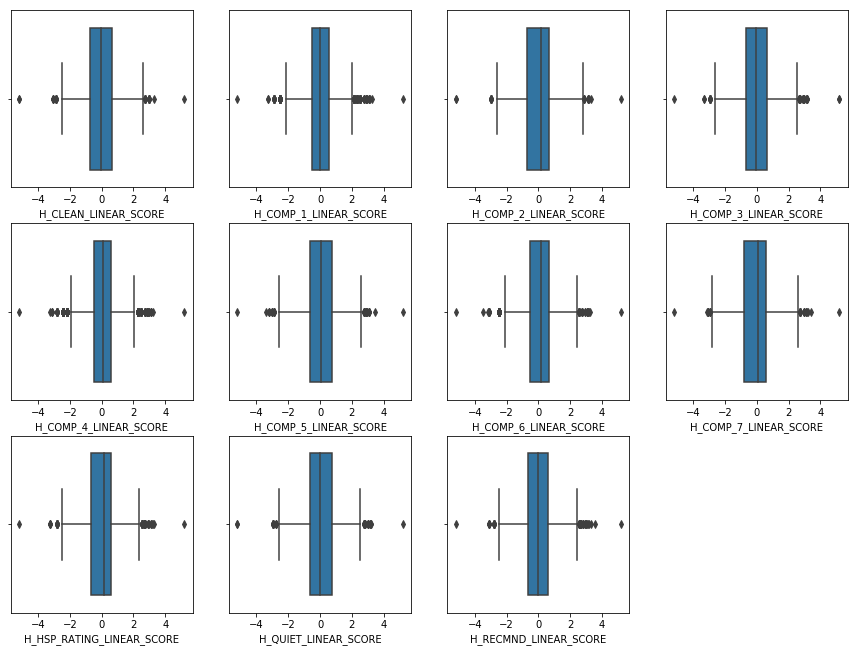

In [144]:
plt.figure(figsize=(15, 15))
plt.subplot(4,4,1)
sns.boxplot(patient_experience_pivot['H_CLEAN_LINEAR_SCORE'])
plt.subplot(4,4,2)
sns.boxplot(patient_experience_pivot['H_COMP_1_LINEAR_SCORE'])
plt.subplot(4,4,3)
sns.boxplot(patient_experience_pivot['H_COMP_2_LINEAR_SCORE'])
plt.subplot(4,4,4)
sns.boxplot(patient_experience_pivot['H_COMP_3_LINEAR_SCORE'])
plt.subplot(4,4,5)
sns.boxplot(patient_experience_pivot['H_COMP_4_LINEAR_SCORE'])
plt.subplot(4,4,6)
sns.boxplot(patient_experience_pivot['H_COMP_5_LINEAR_SCORE'])
plt.subplot(4,4,7)
sns.boxplot(patient_experience_pivot['H_COMP_6_LINEAR_SCORE'])
plt.subplot(4,4,8)
sns.boxplot(patient_experience_pivot['H_COMP_7_LINEAR_SCORE'])
plt.subplot(4,4,9)
sns.boxplot(patient_experience_pivot['H_HSP_RATING_LINEAR_SCORE'])
plt.subplot(4,4,10)
sns.boxplot(patient_experience_pivot['H_QUIET_LINEAR_SCORE'])
plt.subplot(4,4,11)
sns.boxplot(patient_experience_pivot['H_RECMND_LINEAR_SCORE'])

plt.show()

In [145]:
Mortality_pivot=Mortality_pivot.reset_index()

In [146]:
#Creating a new data frame by dropping Provider ID
Mortality_final=Mortality_pivot.drop(['Provider ID'],axis=1)

In [147]:
#Finding the correlations between the variables
Mortality_corr=Mortality_final.corr()
Mortality_corr

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP
Measure ID,,,,,,,
MORT_30_AMI,1.000000,0.201153,0.170000,0.259265,0.257273,0.222533,0.168510
MORT_30_CABG,0.201153,1.000000,0.100048,0.126795,0.108854,0.089011,0.093366
MORT_30_COPD,0.170000,0.100048,1.000000,0.361209,0.328596,0.260125,0.095465
MORT_30_HF,0.259265,0.126795,0.361209,1.000000,0.384063,0.292408,0.082597
MORT_30_PN,0.257273,0.108854,0.328596,0.384063,1.000000,0.236511,0.100814
MORT_30_STK,0.222533,0.089011,0.260125,0.292408,0.236511,1.000000,0.104867
PSI_4_SURG_COMP,0.168510,0.093366,0.095465,0.082597,0.100814,0.104867,1.000000


In [148]:
Readmission_pivot=Readmission_pivot.reset_index()

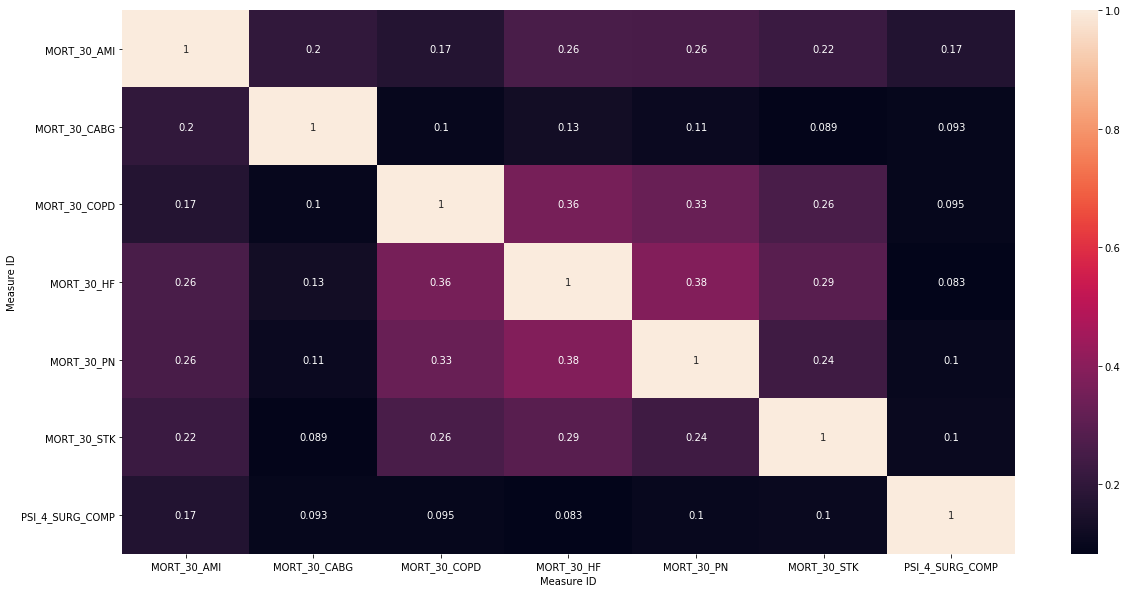

In [149]:
# Checking the correlations between variables in the data set
plt.figure(figsize = (20,10))
sns.heatmap(Mortality_final.corr(),annot = True)
plt.show()

In [150]:
#Creating a new data frame by dropping Provider ID
Readmission_final=Readmission_pivot.drop(['Provider ID'],axis=1)

In [151]:
#Finding the correlations between the variables
Readmission_corr=Readmission_final.corr()
Readmission_corr

Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Measure ID,,,,,,,,
READM_30_AMI,1.000000,0.227675,0.235691,0.306776,0.164981,0.342790,0.263974,0.263728
READM_30_CABG,0.227675,1.000000,0.053556,0.143162,0.065161,0.130947,0.070027,0.077798
READM_30_COPD,0.235691,0.053556,1.000000,0.344552,0.112588,0.458233,0.348591,0.235574
READM_30_HF,0.306776,0.143162,0.344552,1.000000,0.126874,0.525259,0.408814,0.307856
READM_30_HIP_KNEE,0.164981,0.065161,0.112588,0.126874,1.000000,0.278629,0.151348,0.136719
READM_30_HOSP_WIDE,0.342790,0.130947,0.458233,0.525259,0.278629,1.000000,0.539663,0.364342
READM_30_PN,0.263974,0.070027,0.348591,0.408814,0.151348,0.539663,1.000000,0.305343
READM_30_STK,0.263728,0.077798,0.235574,0.307856,0.136719,0.364342,0.305343,1.000000


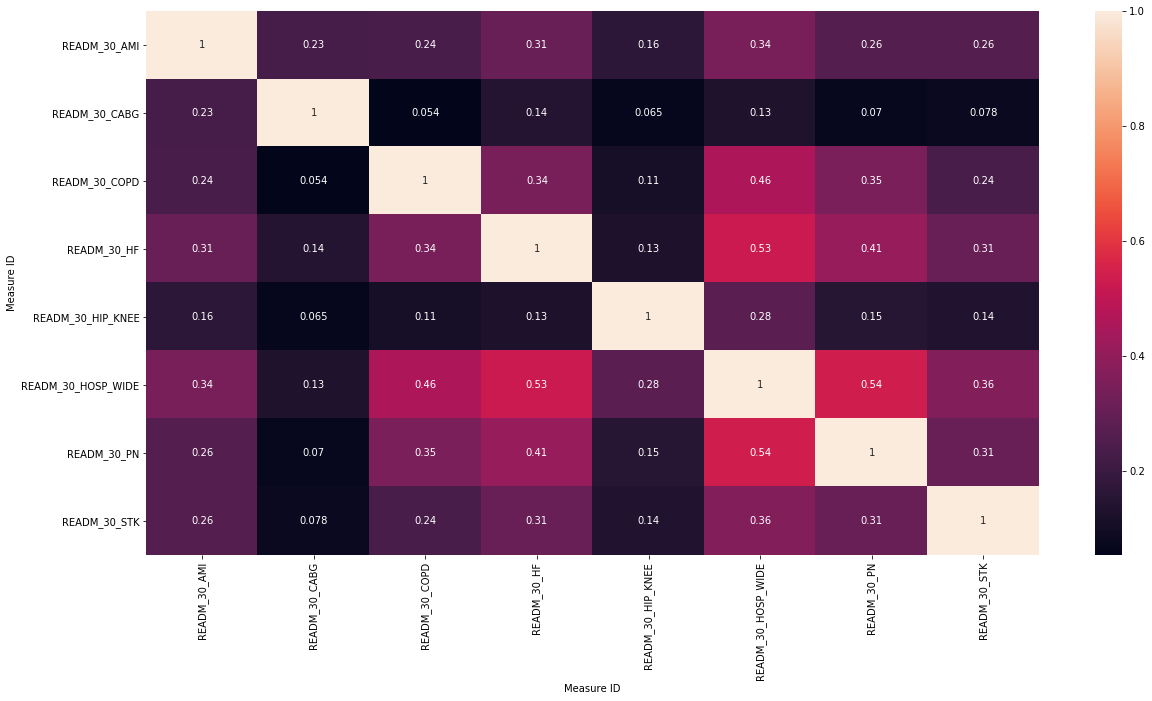

In [152]:
# Checking the correlations between variables in the data set
plt.figure(figsize = (20,10))
sns.heatmap(Readmission_final.corr(),annot = True)
plt.show()

In [153]:
Effective_care_pivot=Effective_care_pivot.reset_index()

In [154]:
#Creating a new data frame by dropping Provider ID
Effective_care_final=Effective_care_pivot.drop(['Provider ID'],axis=1)

In [155]:
#Finding the correlations between the variables
Effective_care_corr=Effective_care_final.corr()
Effective_care_corr

Measure ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
Measure ID,,,,,,,,,,,,,,,,
IMM_2,1.000000,0.059798,-0.125118,0.091420,0.132574,0.149426,0.153934,-0.164088,0.315039,0.264406,0.297994,0.504040,0.347432,0.200100,0.292305,-0.144507
IMM_3_OP_27_FAC_ADHPCT,0.059798,1.000000,-0.052340,-0.007005,0.045744,0.042569,0.014180,-0.059959,0.027217,0.016234,0.004067,0.045624,0.052729,0.004978,0.004634,-0.008533
OP_22,-0.125118,-0.052340,1.000000,-0.052232,-0.037510,-0.043121,-0.123546,0.035510,-0.110328,-0.081618,-0.065383,-0.151485,-0.105929,-0.072600,-0.050116,-0.003219
OP_23,0.091420,-0.007005,-0.052232,1.000000,0.046533,0.058442,0.046383,-0.050752,0.098761,0.091935,0.103439,0.113265,0.126311,0.064255,0.111333,-0.060108
OP_29,0.132574,0.045744,-0.037510,0.046533,1.000000,0.416472,0.065310,-0.078460,0.104745,0.137869,0.104168,0.134426,0.112494,0.132905,0.127087,-0.061345
OP_30,0.149426,0.042569,-0.043121,0.058442,0.416472,1.000000,0.082488,-0.121710,0.148053,0.139252,0.125972,0.148480,0.142516,0.153955,0.143676,-0.054170
OP_4,0.153934,0.014180,-0.123546,0.046383,0.065310,0.082488,1.000000,-0.095335,0.115121,0.096363,0.088149,0.184490,0.157257,0.117752,0.103958,0.010169
PC_01,-0.164088,-0.059959,0.035510,-0.050752,-0.078460,-0.121710,-0.095335,1.000000,-0.159730,-0.130978,-0.177497,-0.138048,-0.179995,-0.181360,-0.161424,0.128531
STK_1,0.315039,0.027217,-0.110328,0.098761,0.104745,0.148053,0.115121,-0.159730,1.000000,0.420099,0.365512,0.445400,0.416336,0.254842,0.304661,-0.220318


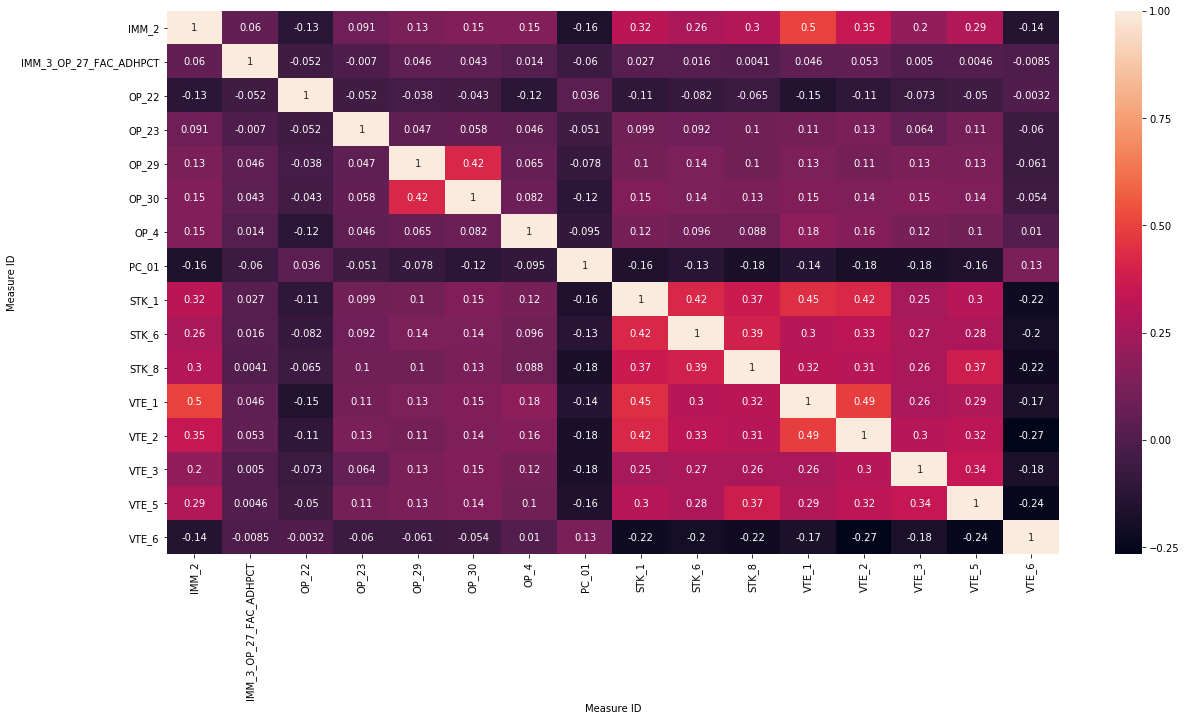

In [156]:
# Checking the correlations between variables in the data set
plt.figure(figsize = (20,10))
sns.heatmap(Effective_care_final.corr(),annot = True)
plt.show()

In [157]:
Timely_care_pivot=Timely_care_pivot.reset_index()

In [158]:
#Creating a new data frame by dropping Provider ID
Timely_care_final=Timely_care_pivot.drop(['Provider ID'],axis=1)

In [159]:
#Finding the correlations between the variables
Timely_care_corr=Timely_care_final.corr()
Timely_care_corr

Measure ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_5
Measure ID,,,,,,
ED_1b,1.000000,0.854946,0.623108,0.397849,0.362700,0.110665
ED_2b,0.854946,1.000000,0.518773,0.287588,0.261880,0.092671
OP_18b,0.623108,0.518773,1.000000,0.521244,0.408867,0.107598
OP_20,0.397849,0.287588,0.521244,1.000000,0.518544,0.124093
OP_21,0.362700,0.261880,0.408867,0.518544,1.000000,0.177495
OP_5,0.110665,0.092671,0.107598,0.124093,0.177495,1.000000


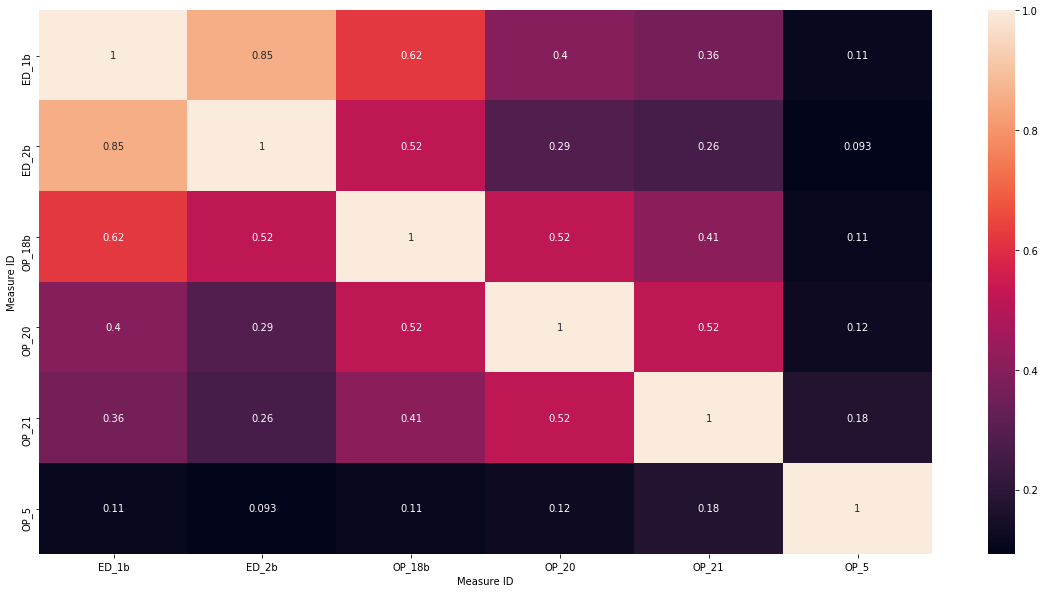

In [160]:
# Checking the correlations between variables in the data set
plt.figure(figsize = (20,10))
sns.heatmap(Timely_care_final.corr(),annot = True)
plt.show()

In [161]:
Timely_care_corr[Timely_care_corr>0.8]

Measure ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_5
Measure ID,,,,,,
ED_1b,1.000000,0.854946,NaN,NaN,NaN,NaN
ED_2b,0.854946,1.000000,NaN,NaN,NaN,NaN
OP_18b,NaN,NaN,1.0,NaN,NaN,NaN
OP_20,NaN,NaN,NaN,1.0,NaN,NaN
OP_21,NaN,NaN,NaN,NaN,1.0,NaN
OP_5,NaN,NaN,NaN,NaN,NaN,1.0


In [162]:
Timely_care_pivot=Timely_care_pivot.drop(['ED_2b'],axis=1)

In [163]:
Timely_care_final=Timely_care_pivot.drop(['Provider ID'],axis=1)

In [164]:
imaging_pivot=imaging_pivot.reset_index()

In [165]:
#Creating a new data frame by dropping Provider ID
imaging_final=imaging_pivot.drop(['Provider ID'],axis=1)

In [166]:
#Finding the correlations between the variables
imaging_corr=imaging_final.corr()
imaging_corr

Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8
Measure ID,,,,,
OP_10,1.000000,0.347489,0.009019,-0.038017,0.041575
OP_11,0.347489,1.000000,0.008071,-0.003582,0.049412
OP_13,0.009019,0.008071,1.000000,0.008624,-0.027841
OP_14,-0.038017,-0.003582,0.008624,1.000000,0.040677
OP_8,0.041575,0.049412,-0.027841,0.040677,1.000000


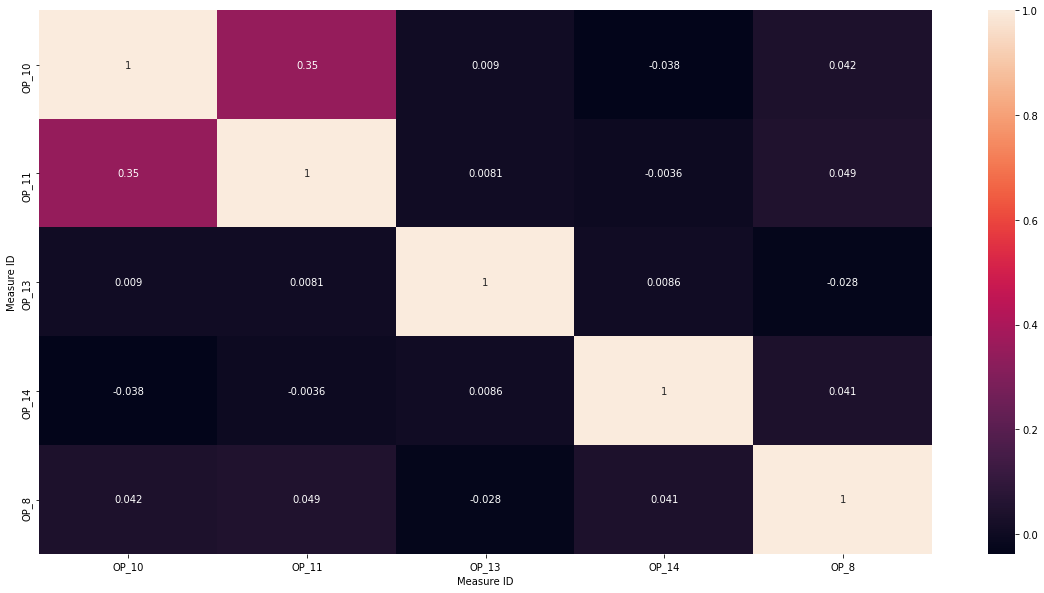

In [167]:
# Checking the correlations between variables in the data set
plt.figure(figsize = (20,10))
sns.heatmap(imaging_final.corr(),annot = True)
plt.show()

In [168]:
Safety_care_pivot=Safety_care_pivot.reset_index()

In [169]:
#Creating a new data frame by dropping Provider ID
Safety_care_final=Safety_care_pivot.drop(['Provider ID'],axis=1)

In [170]:
#Finding the correlations between the variables
Safety_care_corr=Safety_care_final.corr()
Safety_care_corr

Measure ID,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY
Measure ID,,,,,,,
COMP_HIP_KNEE,1.000000,-0.005088,-0.020210,-0.029471,-0.003428,0.021537,0.106805
HAI_1_SIR,-0.005088,1.000000,0.238523,0.117305,0.133010,-0.023562,0.093676
HAI_2_SIR,-0.020210,0.238523,1.000000,0.117209,0.014472,0.170611,0.107189
HAI_3_SIR,-0.029471,0.117305,0.117209,1.000000,0.067418,-0.023755,0.073691
HAI_5_SIR,-0.003428,0.133010,0.014472,0.067418,1.000000,-0.036424,-0.000145
HAI_6_SIR,0.021537,-0.023562,0.170611,-0.023755,-0.036424,1.000000,0.043847
PSI_90_SAFETY,0.106805,0.093676,0.107189,0.073691,-0.000145,0.043847,1.000000


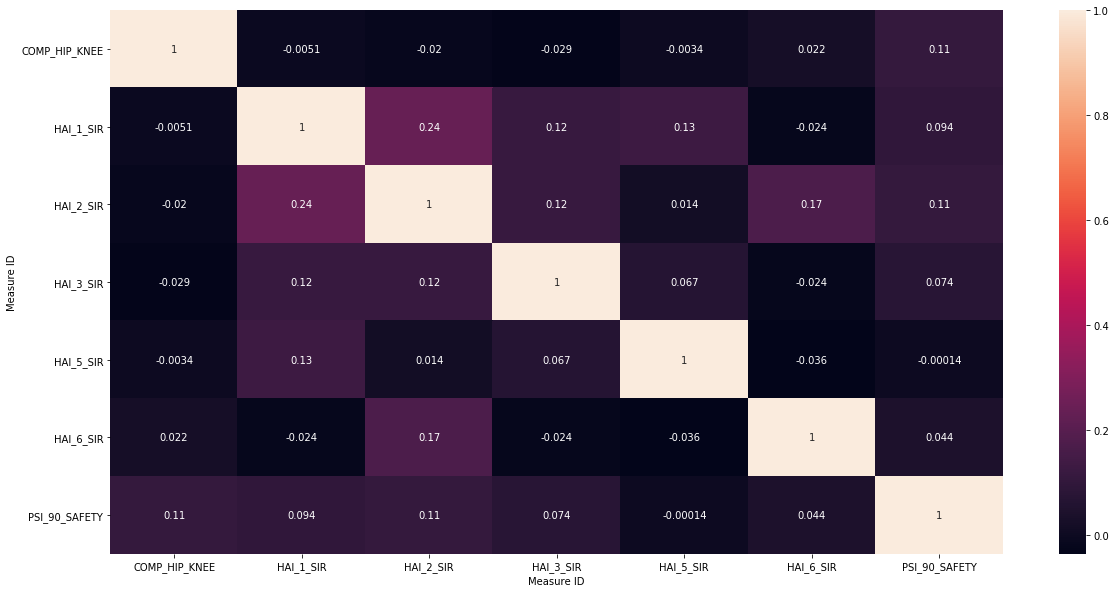

In [171]:
# Checking the correlations between variables in the data set
plt.figure(figsize = (20,10))
sns.heatmap(Safety_care_final.corr(),annot = True)
plt.show()

In [172]:
patient_experience_pivot=patient_experience_pivot.reset_index()

In [173]:
#Creating a new data frame by dropping Provider ID
patient_experience_final=patient_experience_pivot.drop(['Provider ID'],axis=1)

In [174]:
#Finding the correlations between the variables
patient_experience_corr=patient_experience_final.corr()
patient_experience_corr

HCAHPS Measure ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
HCAHPS Measure ID,,,,,,,,,,,
H_CLEAN_LINEAR_SCORE,1.000000,0.694114,0.529389,0.700516,0.623963,0.626226,0.451467,0.639598,0.616851,0.478078,0.533659
H_COMP_1_LINEAR_SCORE,0.694114,1.000000,0.728368,0.836290,0.826366,0.776197,0.610095,0.807499,0.798762,0.579024,0.717380
H_COMP_2_LINEAR_SCORE,0.529389,0.728368,1.000000,0.661325,0.689529,0.689221,0.509472,0.695840,0.709674,0.622457,0.609318
H_COMP_3_LINEAR_SCORE,0.700516,0.836290,0.661325,1.000000,0.752938,0.748882,0.580741,0.721784,0.723611,0.573549,0.614381
H_COMP_4_LINEAR_SCORE,0.623963,0.826366,0.689529,0.752938,1.000000,0.707274,0.549172,0.752618,0.758279,0.541828,0.685914
H_COMP_5_LINEAR_SCORE,0.626226,0.776197,0.689221,0.748882,0.707274,1.000000,0.611046,0.726734,0.724547,0.564608,0.630030
H_COMP_6_LINEAR_SCORE,0.451467,0.610095,0.509472,0.580741,0.549172,0.611046,1.000000,0.652193,0.620838,0.351589,0.564216
H_COMP_7_LINEAR_SCORE,0.639598,0.807499,0.695840,0.721784,0.752618,0.726734,0.652193,1.000000,0.826170,0.531000,0.809265
H_HSP_RATING_LINEAR_SCORE,0.616851,0.798762,0.709674,0.723611,0.758279,0.724547,0.620838,0.826170,1.000000,0.620987,0.908937


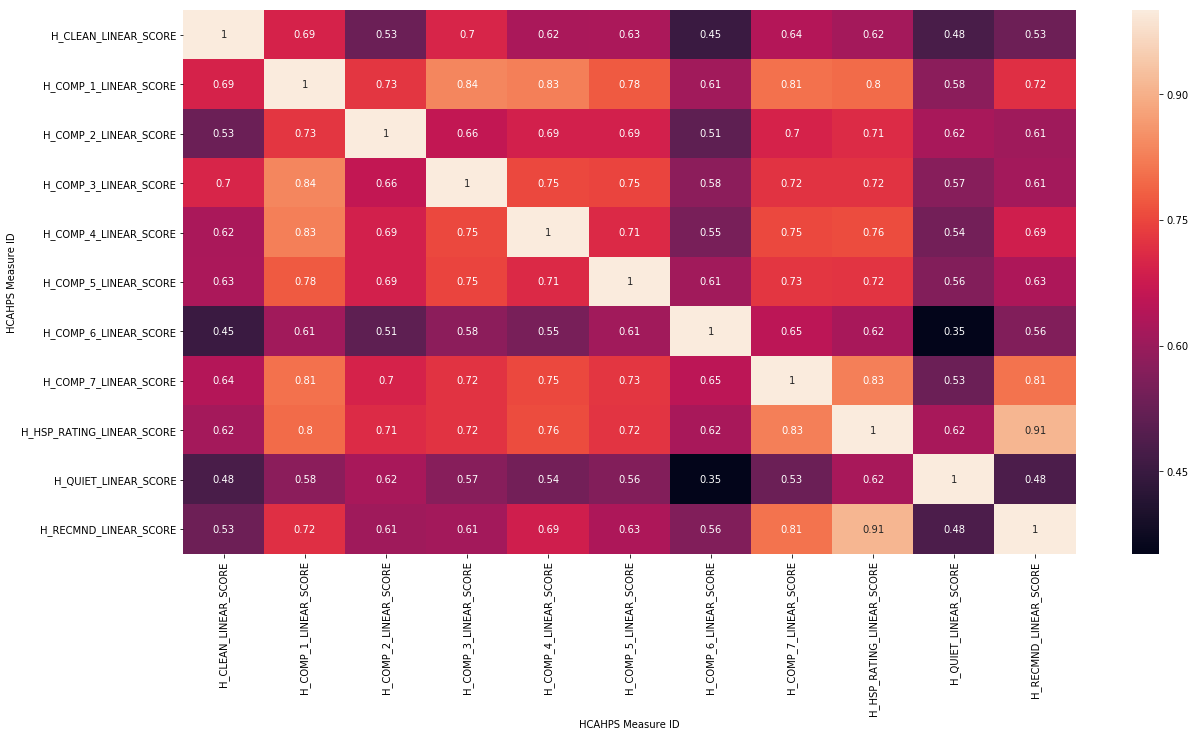

In [175]:
# Checking the correlations between variables in the data set
plt.figure(figsize = (20,10))
sns.heatmap(patient_experience_final.corr(),annot = True)
plt.show()

In [176]:
patient_experience_corr[patient_experience_corr>0.8]

HCAHPS Measure ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
HCAHPS Measure ID,,,,,,,,,,,
H_CLEAN_LINEAR_SCORE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H_COMP_1_LINEAR_SCORE,NaN,1.000000,NaN,0.83629,0.826366,NaN,NaN,0.807499,NaN,NaN,NaN
H_COMP_2_LINEAR_SCORE,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H_COMP_3_LINEAR_SCORE,NaN,0.836290,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H_COMP_4_LINEAR_SCORE,NaN,0.826366,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
H_COMP_5_LINEAR_SCORE,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
H_COMP_6_LINEAR_SCORE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
H_COMP_7_LINEAR_SCORE,NaN,0.807499,NaN,NaN,NaN,NaN,NaN,1.000000,0.826170,NaN,0.809265
H_HSP_RATING_LINEAR_SCORE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826170,1.000000,NaN,0.908937


In [177]:
patient_experience_pivot=patient_experience_pivot.drop(['H_COMP_3_LINEAR_SCORE','H_COMP_4_LINEAR_SCORE','H_COMP_7_LINEAR_SCORE','H_HSP_RATING_LINEAR_SCORE'],axis=1)

In [178]:
patient_experience_final=patient_experience_pivot.drop(['Provider ID'],axis=1)

### Merging into Master frame

In [179]:
Master_frame = pd.read_csv("Hospital General Information.csv", encoding="latin-1",
                         usecols=["Provider ID", "Hospital overall rating"])
Master_frame = Master_frame.loc[Master_frame["Hospital overall rating"] != "Not Available"]
Master_frame["Hospital overall rating"] = Master_frame["Hospital overall rating"].astype(int)
Master_frame.head()

,Provider ID,Hospital overall rating
0,10001,3
1,10005,3
2,10006,2
3,10007,3
4,10008,3


In [180]:
Master_frame=pd.merge(Master_frame,Readmission_pivot,on='Provider ID')
Master_frame=pd.merge(Master_frame,imaging_pivot,on='Provider ID')
Master_frame=pd.merge(Master_frame,Effective_care_pivot,on='Provider ID')
Master_frame=pd.merge(Master_frame,Timely_care_pivot,on='Provider ID')
Master_frame=pd.merge(Master_frame,Mortality_pivot,on='Provider ID')
Master_frame=pd.merge(Master_frame,Safety_care_pivot,on='Provider ID')
Master_frame=pd.merge(Master_frame,patient_experience_pivot,on='Provider ID')

In [181]:
Master_frame.head(5)

,Provider ID,Hospital overall rating,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,...,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
0,10001,3,1.040090,-1.615945,-1.111702,0.608973,-1.324958,0.293986,-1.223287,-0.790168,...,1.320731,0.430727,1.639539,1.059682,0.899534,-0.369558,0.723343,-0.290058,-1.199766,-0.656486
1,10005,3,0.868016,-0.022584,1.786156,0.286135,-2.043115,0.982556,0.613509,-1.255743,...,-1.317226,1.084434,0.580524,1.286702,0.546700,-1.100140,-0.607463,-0.540882,-0.807429,-0.441766
2,10006,2,1.401177,-1.689670,0.395204,1.161976,-1.176890,0.293986,-0.793602,0.977487,...,-1.235796,0.914389,-0.702315,1.286702,0.546700,-1.100140,0.500651,1.340200,-0.807429,1.169401
3,10007,3,-0.002509,-0.022584,0.325577,0.810910,-0.085414,-1.318946,-0.415634,-0.790168,...,-0.100535,5.199338,0.935852,-0.703922,0.546700,-1.873053,-1.042247,0.650274,-1.994971,0.802226
4,10008,3,-0.002509,-0.022584,0.873515,-1.037937,-0.085414,-0.377630,0.920412,-0.052716,...,-0.100535,0.791884,-0.613509,-0.023839,0.015055,0.156199,0.046436,0.166367,-0.011291,0.003764


In [182]:
Master_frame.shape

(3648, 57)

In [183]:
#Splitting the data in train and test

#Define X
X = Master_frame.drop(['Hospital overall rating','Provider ID'],axis=1)

#Define y
y = Master_frame['Hospital overall rating']

#Normalization
def Normalization (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
X_normalize = X.apply(Normalization) 
X_normalize.head()

,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,OP_10,OP_11,...,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
0,0.600021,0.344601,0.393092,0.558563,0.372584,0.528271,0.382361,0.424013,0.519312,0.434315,...,0.627010,0.541421,0.657668,0.601905,0.718395,0.568907,0.478640,0.472106,0.384623,0.436868
1,0.583474,0.497828,0.671768,0.527516,0.303522,0.594489,0.558999,0.379240,0.395083,0.204090,...,0.373328,0.604286,0.555827,0.623737,0.676834,0.482850,0.323629,0.447985,0.422353,0.457517
2,0.634746,0.337511,0.538005,0.611743,0.386823,0.528271,0.423682,0.594001,0.405021,0.258687,...,0.381158,0.587933,0.432461,0.623737,0.676834,0.482850,0.452701,0.628882,0.422353,0.612457
3,0.499759,0.497828,0.531309,0.577982,0.491786,0.373162,0.460030,0.424013,0.344601,0.239271,...,0.490332,1.000000,0.589997,0.432307,0.676834,0.391808,0.272986,0.562534,0.308151,0.577147
4,0.499759,0.497828,0.584003,0.400186,0.491786,0.463685,0.588512,0.494930,0.574187,0.338600,...,0.490332,0.576152,0.441001,0.497707,0.614211,0.630836,0.399795,0.515999,0.498914,0.500362


In [184]:
#Split the data and check for count of values in each train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, train_size=0.7,test_size=0.3,random_state=100)

print("X_train Values: ",X_train.shape)
print("y_train Values: ",y_train.shape)
print("X_test Values: ",X_test.shape)
print("y_test Values: ",y_test.shape)

X_train Values:  (2553, 55)
y_train Values:  (2553,)
X_test Values:  (1095, 55)
y_test Values:  (1095,)


### Linear Regression

In [185]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [186]:
col = X_train.columns[rfe.support_]
col

Index(['READM_30_AMI', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HOSP_WIDE',
       'READM_30_PN', 'READM_30_STK', 'OP_10', 'VTE_1', 'ED_1b', 'OP_20',
       'MORT_30_AMI', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'PSI_4_SURG_COMP', 'COMP_HIP_KNEE', 'PSI_90_SAFETY',
       'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
       'H_COMP_6_LINEAR_SCORE', 'H_QUIET_LINEAR_SCORE',
       'H_RECMND_LINEAR_SCORE'],
      dtype='object')

In [187]:
X_train.columns[~rfe.support_]

Index(['READM_30_CABG', 'READM_30_HIP_KNEE', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23', 'OP_29', 'OP_30',
       'OP_4', 'PC_01', 'STK_1', 'STK_6', 'STK_8', 'VTE_2', 'VTE_3', 'VTE_5',
       'VTE_6', 'OP_18b', 'OP_21', 'OP_5', 'MORT_30_CABG', 'HAI_1_SIR',
       'HAI_2_SIR', 'HAI_3_SIR', 'HAI_5_SIR', 'HAI_6_SIR'],
      dtype='object')

In [188]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [189]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [190]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [191]:
print(lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.835
Model:                                 OLS   Adj. R-squared:                  0.833
Method:                      Least Squares   F-statistic:                     511.5
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:11   Log-Likelihood:                -833.78
No. Observations:                     2553   AIC:                             1720.
Df Residuals:                         2527   BIC:                             1872.
Df Model:                               25                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [192]:
X_train_lm0 = X_train_rfe.drop(['const'], axis=1)

In [193]:

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm0
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,H_COMP_1_LINEAR_SCORE,95.38
20,H_COMP_2_LINEAR_SCORE,64.15
24,H_RECMND_LINEAR_SCORE,54.00
3,READM_30_HOSP_WIDE,48.42
18,H_CLEAN_LINEAR_SCORE,45.52
23,H_QUIET_LINEAR_SCORE,45.48
22,H_COMP_6_LINEAR_SCORE,41.29
4,READM_30_PN,36.11
2,READM_30_HF,34.29
13,MORT_30_PN,33.79


In [194]:
X_train_1 = X_train_rfe.drop(["H_COMP_1_LINEAR_SCORE"], axis = 1)

In [195]:
X_train_lm = sm.add_constant(X_train_1)

In [196]:
lm1 = sm.OLS(y_train,X_train_lm).fit()

In [197]:
print(lm1.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.827
Model:                                 OLS   Adj. R-squared:                  0.825
Method:                      Least Squares   F-statistic:                     503.3
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:11   Log-Likelihood:                -894.76
No. Observations:                     2553   AIC:                             1840.
Df Residuals:                         2528   BIC:                             1986.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [198]:
X_train_1 = X_train_1.drop(['const'], axis=1)

In [199]:
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,H_COMP_2_LINEAR_SCORE,59.69
23,H_RECMND_LINEAR_SCORE,49.88
3,READM_30_HOSP_WIDE,48.24
22,H_QUIET_LINEAR_SCORE,45.24
21,H_COMP_6_LINEAR_SCORE,40.00
18,H_CLEAN_LINEAR_SCORE,39.95
4,READM_30_PN,36.08
2,READM_30_HF,34.25
13,MORT_30_PN,33.79
12,MORT_30_HF,32.43


In [200]:
X_train_2 = X_train_1.drop(["H_COMP_2_LINEAR_SCORE"], axis = 1)

In [201]:
X_train_lm2 = sm.add_constant(X_train_2)

In [202]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()

In [203]:
print(lm2.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.824
Model:                                 OLS   Adj. R-squared:                  0.823
Method:                      Least Squares   F-statistic:                     516.1
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:11   Log-Likelihood:                -913.51
No. Observations:                     2553   AIC:                             1875.
Df Residuals:                         2529   BIC:                             2015.
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [204]:
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [205]:
vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,READM_30_HOSP_WIDE,48.24
22,H_RECMND_LINEAR_SCORE,46.28
21,H_QUIET_LINEAR_SCORE,40.64
18,H_CLEAN_LINEAR_SCORE,39.89
20,H_COMP_6_LINEAR_SCORE,39.67
4,READM_30_PN,36.07
2,READM_30_HF,34.23
13,MORT_30_PN,33.74
12,MORT_30_HF,32.27
1,READM_30_COPD,30.07


In [206]:
X_train_3 = X_train_2.drop(["READM_30_HOSP_WIDE"], axis = 1)

In [207]:
X_train_lm3 = sm.add_constant(X_train_3)

In [208]:
lm3 = sm.OLS(y_train,X_train_lm3).fit()

In [209]:
print(lm3.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.757
Model:                                 OLS   Adj. R-squared:                  0.755
Method:                      Least Squares   F-statistic:                     358.0
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:12   Log-Likelihood:                -1328.6
No. Observations:                     2553   AIC:                             2703.
Df Residuals:                         2530   BIC:                             2838.
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [210]:
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

In [211]:
vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,H_RECMND_LINEAR_SCORE,46.17
20,H_QUIET_LINEAR_SCORE,40.62
17,H_CLEAN_LINEAR_SCORE,39.89
19,H_COMP_6_LINEAR_SCORE,39.33
12,MORT_30_PN,33.74
11,MORT_30_HF,32.26
3,READM_30_PN,31.99
2,READM_30_HF,31.22
8,OP_20,29.83
10,MORT_30_COPD,28.60


In [212]:
X_train_4 = X_train_3.drop(["H_RECMND_LINEAR_SCORE"], axis = 1)

In [213]:
X_train_lm4 = sm.add_constant(X_train_4)

In [214]:
lm4 = sm.OLS(y_train,X_train_lm4).fit()

In [215]:
print(lm4.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.736
Model:                                 OLS   Adj. R-squared:                  0.734
Method:                      Least Squares   F-statistic:                     336.5
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:12   Log-Likelihood:                -1432.5
No. Observations:                     2553   AIC:                             2909.
Df Residuals:                         2531   BIC:                             3037.
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [216]:
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

In [217]:
vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,H_CLEAN_LINEAR_SCORE,37.92
20,H_QUIET_LINEAR_SCORE,37.88
19,H_COMP_6_LINEAR_SCORE,35.53
12,MORT_30_PN,33.48
11,MORT_30_HF,32.21
3,READM_30_PN,31.96
2,READM_30_HF,31.02
8,OP_20,29.64
10,MORT_30_COPD,28.57
4,READM_30_STK,28.12


In [218]:
X_train_5 = X_train_4.drop(["H_CLEAN_LINEAR_SCORE"], axis = 1)

In [219]:
X_train_lm5 = sm.add_constant(X_train_5)

In [220]:
lm5 = sm.OLS(y_train,X_train_lm5).fit()

In [221]:
print(lm5.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.722
Model:                                 OLS   Adj. R-squared:                  0.720
Method:                      Least Squares   F-statistic:                     329.5
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:12   Log-Likelihood:                -1497.8
No. Observations:                     2553   AIC:                             3038.
Df Residuals:                         2532   BIC:                             3160.
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [222]:
X_train_lm5 = X_train_lm5.drop(['const'], axis=1)

In [223]:
vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,H_QUIET_LINEAR_SCORE,36.24
18,H_COMP_6_LINEAR_SCORE,34.16
12,MORT_30_PN,33.44
3,READM_30_PN,31.96
11,MORT_30_HF,31.91
2,READM_30_HF,31.01
8,OP_20,29.52
10,MORT_30_COPD,28.55
4,READM_30_STK,28.12
1,READM_30_COPD,27.83


In [224]:
X_train_6 = X_train_5.drop(["H_QUIET_LINEAR_SCORE"], axis = 1)

In [225]:
X_train_lm6 = sm.add_constant(X_train_6)

In [226]:
lm6 = sm.OLS(y_train,X_train_lm6).fit()

In [227]:
print(lm6.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.708
Model:                                 OLS   Adj. R-squared:                  0.706
Method:                      Least Squares   F-statistic:                     323.5
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:12   Log-Likelihood:                -1561.8
No. Observations:                     2553   AIC:                             3164.
Df Residuals:                         2533   BIC:                             3281.
Df Model:                               19                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [228]:
X_train_lm6 = X_train_lm6.drop(['const'], axis=1)

In [229]:
vif = pd.DataFrame()
X = X_train_lm6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,H_COMP_6_LINEAR_SCORE,33.88
12,MORT_30_PN,33.44
3,READM_30_PN,31.88
11,MORT_30_HF,31.86
2,READM_30_HF,30.86
8,OP_20,29.01
10,MORT_30_COPD,28.52
4,READM_30_STK,28.00
1,READM_30_COPD,27.72
0,READM_30_AMI,27.26


In [230]:
X_train_7 = X_train_6.drop(["H_COMP_6_LINEAR_SCORE"], axis = 1)

In [231]:
X_train_lm7 = sm.add_constant(X_train_7)

In [232]:
lm7 = sm.OLS(y_train,X_train_lm7).fit()

In [233]:
print(lm7.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.688
Model:                                 OLS   Adj. R-squared:                  0.686
Method:                      Least Squares   F-statistic:                     310.9
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:13   Log-Likelihood:                -1645.6
No. Observations:                     2553   AIC:                             3329.
Df Residuals:                         2534   BIC:                             3440.
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [234]:
X_train_lm7 = X_train_lm7.drop(['const'], axis=1)

In [235]:
vif = pd.DataFrame()
X = X_train_lm7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,MORT_30_PN,33.43
3,READM_30_PN,31.87
11,MORT_30_HF,31.63
2,READM_30_HF,30.77
8,OP_20,28.70
10,MORT_30_COPD,28.49
4,READM_30_STK,27.99
1,READM_30_COPD,27.50
0,READM_30_AMI,27.23
13,MORT_30_STK,26.36


In [236]:
X_train_8 = X_train_7.drop(["MORT_30_PN"], axis = 1)

In [237]:
X_train_lm8 = sm.add_constant(X_train_8)

In [238]:
lm8 = sm.OLS(y_train,X_train_lm8).fit()

In [239]:
print(lm8.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.670
Model:                                 OLS   Adj. R-squared:                  0.667
Method:                      Least Squares   F-statistic:                     302.2
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:13   Log-Likelihood:                -1720.2
No. Observations:                     2553   AIC:                             3476.
Df Residuals:                         2535   BIC:                             3582.
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [240]:
X_train_lm8 = X_train_lm8.drop(['const'], axis=1)

In [241]:
vif = pd.DataFrame()
X = X_train_lm8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,READM_30_PN,31.46
2,READM_30_HF,30.77
11,MORT_30_HF,29.29
8,OP_20,28.52
4,READM_30_STK,27.98
1,READM_30_COPD,27.49
0,READM_30_AMI,27.20
10,MORT_30_COPD,26.88
12,MORT_30_STK,26.16
13,PSI_4_SURG_COMP,25.83


In [242]:
X_train_9 = X_train_8.drop(["OP_20"], axis = 1)

In [243]:
X_train_lm9 = sm.add_constant(X_train_9)

In [244]:
lm9 = sm.OLS(y_train,X_train_lm9).fit()
print(lm9.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.670
Model:                                 OLS   Adj. R-squared:                  0.668
Method:                      Least Squares   F-statistic:                     321.2
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:13   Log-Likelihood:                -1720.2
No. Observations:                     2553   AIC:                             3474.
Df Residuals:                         2536   BIC:                             3574.
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [245]:
X_train_lm9 = X_train_lm9.drop(['const'], axis=1)

In [246]:
vif = pd.DataFrame()
X = X_train_lm9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,READM_30_PN,31.44
2,READM_30_HF,30.63
10,MORT_30_HF,29.17
4,READM_30_STK,27.93
1,READM_30_COPD,27.48
0,READM_30_AMI,27.20
9,MORT_30_COPD,26.78
11,MORT_30_STK,26.03
12,PSI_4_SURG_COMP,25.77
8,MORT_30_AMI,25.26


In [247]:
X_train_10 = X_train_9.drop(["READM_30_PN"], axis = 1)

In [248]:
X_train_lm10 = sm.add_constant(X_train_10)

In [249]:
lm10 = sm.OLS(y_train,X_train_lm10).fit()
print(lm10.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.647
Model:                                 OLS   Adj. R-squared:                  0.645
Method:                      Least Squares   F-statistic:                     309.9
Date:                     Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                             18:07:13   Log-Likelihood:                -1804.9
No. Observations:                     2553   AIC:                             3642.
Df Residuals:                         2537   BIC:                             3735.
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [250]:
X_train_lm10 = X_train_lm10.drop(['const'], axis=1)

In [251]:
vif = pd.DataFrame()
X = X_train_lm10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,MORT_30_HF,29.15
2,READM_30_HF,28.35
3,READM_30_STK,27.00
0,READM_30_AMI,26.99
8,MORT_30_COPD,26.78
10,MORT_30_STK,26.03
1,READM_30_COPD,26.01
11,PSI_4_SURG_COMP,25.69
7,MORT_30_AMI,25.23
12,COMP_HIP_KNEE,22.73


In [252]:
y_train_price = lm10.predict(X_train_lm9)

### Model Evaluation

Text(0.5, 0, 'Errors')

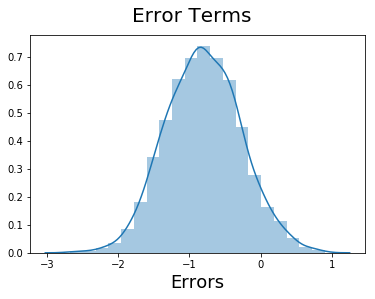

In [253]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [254]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_10.columns]

In [255]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [256]:
# Making predictions
y_pred = lm10.predict(X_test_new)

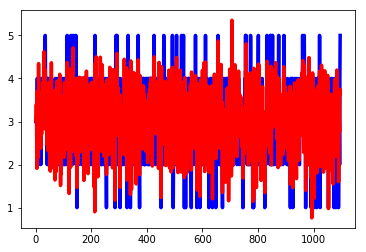

In [257]:
c = [i for i in range(1,1096,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")


In [258]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6794482776221095

In [259]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.4829710956249968


### Random Forest

In [260]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
RandomForest_Model = RandomForestClassifier(class_weight='balanced')

#Model fit
RandomForest_Model.fit(X_train,y_train)

#Predictions
y_pred_RandomForest = RandomForest_Model.predict(X_test)

In [261]:
from sklearn.metrics import confusion_matrix
confusion_mat_RandomForest=confusion_matrix(y_test,y_pred_RandomForest)
confusion_mat_RandomForest

array([[ 12,  23,   2,   0,   0],
       [  6, 115, 113,   1,   0],
       [  0,  44, 419,  50,   0],
       [  0,   1, 117, 155,   2],
       [  0,   0,   3,  22,  10]], dtype=int64)

In [262]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

TP = confusion_mat_RandomForest[1,1] # true positive 
TN = confusion_mat_RandomForest[0,0] # true negatives
FP = confusion_mat_RandomForest[0,1] # false positives
FN = confusion_mat_RandomForest[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_RandomForest)*100)   #Accuracy
print('Sensitivity: ', TP / float(TP+FN)*100)  #Sensitivity
print('Specificity: ',TN / float(TN+FP)*100)   #Specificity
print('False Postive Rate: ',FP/ float(TN+FP)*100)  #FPR
print('Positive Predictive Value: ', TP / float(TP+FP)*100)  #PPV
print('Negative Predictive Value: ',TN / float(TN+ FN)*100)  #NPV
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN)*100)  #Misclassification rate

Accuracy Score on test data:  64.93150684931507
Sensitivity:  95.0413223140496
Specificity:  34.285714285714285
False Postive Rate:  65.71428571428571
Positive Predictive Value:  83.33333333333334
Negative Predictive Value:  66.66666666666666
Misclassification Rate:  18.58974358974359


In [263]:
#Tuning Hyperparameter for Random Forest

#GridSearchCV for max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Number of folds for k-fold CV
n_folds = 5

#Parameters of the model
parameters = {'max_depth': range(2, 20, 5)}

#Model creation
RandomForest_Model_HP = RandomForestClassifier(class_weight='balanced')


RandomForest_Model_HP = GridSearchCV(RandomForest_Model_HP, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1)
RandomForest_Model_HP.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [264]:
#GridSearchCV Score
GridSearchCV_ScoreRF = RandomForest_Model_HP.cv_results_
pd.DataFrame(GridSearchCV_ScoreRF).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040602,0.005714,0.0040,0.000633,2,{'max_depth': 2},0.373047,0.479452,0.469667,0.410959,...,0.439091,0.040698,4,0.412543,0.499510,0.471596,0.455926,0.474328,0.462781,0.028744
1,0.106206,0.045625,0.0042,0.001470,7,{'max_depth': 7},0.650391,0.655577,0.637965,0.653620,...,0.654916,0.012671,3,0.832435,0.814887,0.844760,0.833497,0.831785,0.831473,0.009558
2,0.097205,0.012271,0.0042,0.001939,12,{'max_depth': 12},0.644531,0.720157,0.692759,0.675147,...,0.688993,0.027257,1,0.976972,0.978452,0.969148,0.978942,0.975061,0.975715,0.003551
3,0.109206,0.021684,0.0044,0.000800,17,{'max_depth': 17},0.671875,0.681018,0.659491,0.682975,...,0.674501,0.008412,2,0.991671,0.992654,0.989716,0.987267,0.990220,0.990306,0.001842


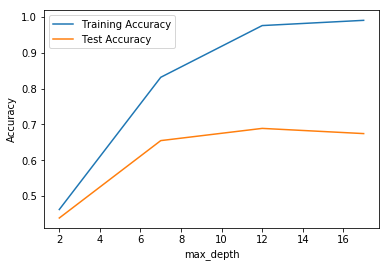

In [265]:
#Accuracy with max_depth
plt.figure()
plt.plot(GridSearchCV_ScoreRF["param_max_depth"], 
         GridSearchCV_ScoreRF["mean_train_score"], 
         label="Training Accuracy")
plt.plot(GridSearchCV_ScoreRF["param_max_depth"], 
         GridSearchCV_ScoreRF["mean_test_score"], 
         label="Test Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [266]:
#GridSearchCV for n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Number of folds for k-fold CV
n_folds = 5

#Parameters of the model
parameters = {'n_estimators': range(100, 1500, 400)}

#Model creation
RandomForest_Model_HP1 = RandomForestClassifier(max_depth=7, class_weight='balanced')

RandomForest_Model_HP1 = GridSearchCV(RandomForest_Model_HP1, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1)
RandomForest_Model_HP1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [267]:
#GridSearchCV Score
GridSearchCV_ScoreRF1 = RandomForest_Model_HP1.cv_results_
pd.DataFrame(GridSearchCV_ScoreRF1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.650637,0.134595,0.021601,0.002653,100,{'n_estimators': 100},0.724609,0.737769,0.700587,0.698630,...,0.717587,0.015381,4,0.900049,0.893242,0.900098,0.885406,0.882152,0.892189,0.007378
1,3.071576,0.414257,0.091405,0.004800,500,{'n_estimators': 500},0.718750,0.747554,0.702544,0.729941,...,0.727380,0.015634,2,0.901519,0.901567,0.894221,0.903526,0.888020,0.897771,0.005818
2,5.238300,0.223151,0.190011,0.047823,900,{'n_estimators': 900},0.718750,0.741683,0.708415,0.729941,...,0.726596,0.011746,3,0.905439,0.901567,0.895690,0.896670,0.892910,0.898455,0.004473
3,7.600235,1.370461,0.200411,0.029037,1300,{'n_estimators': 1300},0.728516,0.753425,0.706458,0.718200,...,0.728946,0.016165,1,0.903479,0.904016,0.899608,0.900098,0.888509,0.899142,0.005599


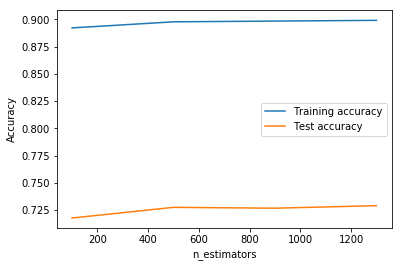

In [268]:
#Accuracy with n_estimators
plt.figure()
plt.plot(GridSearchCV_ScoreRF1["param_n_estimators"], 
         GridSearchCV_ScoreRF1["mean_train_score"], 
         label="Training accuracy")
plt.plot(GridSearchCV_ScoreRF1["param_n_estimators"], 
         GridSearchCV_ScoreRF1["mean_test_score"], 
         label="Test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [269]:
# GridSearchCV for max_features

#Number of folds for k-fold CV
n_folds = 5

#Parameters of the model
parameters = {'max_features': [11, 22, 33, 44, 55]}

#Model creation
RandomForest_Model_HP2 = RandomForestClassifier(max_depth=7,class_weight='balanced')

RandomForest_Model_HP2 = GridSearchCV(RandomForest_Model_HP2, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1)
RandomForest_Model_HP2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [11, 22, 33, 44, 55]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [270]:
#GridSearchCV Score
GridSearchCV_ScoreRF2 = RandomForest_Model_HP2.cv_results_
pd.DataFrame(GridSearchCV_ScoreRF2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.126207,0.047325,0.0032,0.000400,11,{'max_features': 11},0.687500,0.692759,0.688845,0.704501,...,0.690952,0.007745,5,0.859873,0.854554,0.866797,0.851616,0.834230,0.853414,0.010894
1,0.143608,0.005463,0.0036,0.000800,22,{'max_features': 22},0.683594,0.737769,0.698630,0.692759,...,0.708186,0.021053,3,0.870162,0.876102,0.861410,0.860431,0.860147,0.865650,0.006405
2,0.197811,0.002638,0.0034,0.000490,33,{'max_features': 33},0.701172,0.741683,0.679061,0.698630,...,0.706228,0.020491,4,0.872122,0.851126,0.874143,0.864838,0.848900,0.862226,0.010465
3,0.258215,0.003710,0.0032,0.000400,44,{'max_features': 44},0.703125,0.743640,0.696673,0.751468,...,0.727380,0.022782,1,0.874571,0.901567,0.861900,0.875122,0.865037,0.875640,0.013963
4,0.293817,0.020184,0.0028,0.000748,55,{'max_features': 55},0.693359,0.731898,0.682975,0.737769,...,0.716804,0.023746,2,0.840274,0.868756,0.858962,0.874143,0.840587,0.856544,0.014029


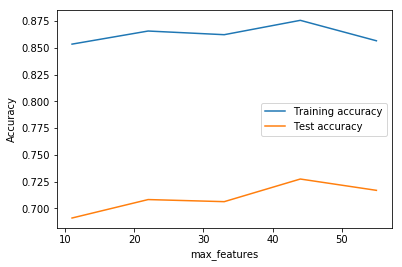

In [271]:
#Accuracy with max_features
plt.figure()
plt.plot(GridSearchCV_ScoreRF2["param_max_features"], 
         GridSearchCV_ScoreRF2["mean_train_score"], 
         label="Training accuracy")
plt.plot(GridSearchCV_ScoreRF2["param_max_features"], 
         GridSearchCV_ScoreRF2["mean_test_score"], 
         label="Test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [272]:
# GridSearchCV for min_samples_leaf

#Number of folds for k-fold CV
n_folds = 5

#Parameters of the model
parameters = {'min_samples_leaf': range(30, 300, 30)}

#Model creation
RandomForest_Model_HP3 = RandomForestClassifier(max_depth=7,class_weight='balanced')

RandomForest_Model_HP3 = GridSearchCV(RandomForest_Model_HP3, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1)
RandomForest_Model_HP3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(30, 300, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [273]:
#GridSearchCV Score
GridSearchCV_ScoreRF3 = RandomForest_Model_HP3.cv_results_
pd.DataFrame(GridSearchCV_ScoreRF3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069004,0.011967,0.004200,7.483537e-04,30,{'min_samples_leaf': 30},0.619141,0.614481,0.636008,0.604697,...,0.612613,0.015692,1,0.705047,0.691479,0.714985,0.702253,0.690465,0.700846,0.009111
1,0.065404,0.025241,0.004000,1.265046e-03,60,{'min_samples_leaf': 60},0.560547,0.610568,0.577299,0.534247,...,0.559342,0.033603,2,0.593337,0.605779,0.594515,0.608717,0.585819,0.597633,0.008449
2,0.052003,0.011190,0.011601,1.426405e-02,90,{'min_samples_leaf': 90},0.589844,0.549902,0.549902,0.495108,...,0.546808,0.030190,3,0.568839,0.558276,0.601371,0.556807,0.582396,0.573538,0.016662
3,0.051803,0.009948,0.003000,1.168008e-07,120,{'min_samples_leaf': 120},0.472656,0.467710,0.506849,0.487280,...,0.482570,0.013780,4,0.488976,0.533790,0.521058,0.512733,0.520782,0.515468,0.014863
4,0.037602,0.004409,0.006600,6.711562e-03,150,{'min_samples_leaf': 150},0.421875,0.479452,0.465753,0.471624,...,0.460635,0.020116,5,0.475257,0.453967,0.461802,0.473066,0.470905,0.466999,0.007964


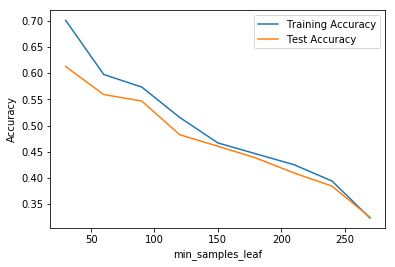

In [274]:
#Accuracy on min_samples_leaf
plt.figure()
plt.plot(GridSearchCV_ScoreRF3["param_min_samples_leaf"], 
         GridSearchCV_ScoreRF3["mean_train_score"], 
         label="Training Accuracy")
plt.plot(GridSearchCV_ScoreRF3["param_min_samples_leaf"], 
         GridSearchCV_ScoreRF3["mean_test_score"], 
         label="Test Accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [275]:
# GridSearchCV for min_samples_split

#Number of folds for k-fold CV
n_folds = 5

#Parameters of the model
parameters = {'min_samples_split': range(30, 300, 30)}

#Model creation
RandomForest_Model_HP4 = RandomForestClassifier(max_depth=7,class_weight='balanced')

RandomForest_Model_HP4 = GridSearchCV(RandomForest_Model_HP4, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1)
RandomForest_Model_HP4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(30, 300, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [276]:
#GridSearchCV Score
GridSearchCV_ScoreRF4 = RandomForest_Model_HP4.cv_results_
pd.DataFrame(GridSearchCV_ScoreRF4).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071804,0.018756,0.0038,0.000400,30,{'min_samples_split': 30},0.628906,0.692759,0.651663,0.622309,...,0.652174,0.025523,1,0.742773,0.759060,0.766405,0.758570,0.780929,0.761548,0.012384
1,0.076204,0.026778,0.0038,0.000748,60,{'min_samples_split': 60},0.625000,0.637965,0.665362,0.667319,...,0.645515,0.017514,2,0.745223,0.714496,0.743879,0.716944,0.723716,0.728852,0.013176
2,0.073404,0.025194,0.0034,0.000490,90,{'min_samples_split': 90},0.625000,0.610568,0.594912,0.626223,...,0.610262,0.013829,3,0.683978,0.666503,0.658178,0.686092,0.668949,0.672740,0.010676
3,0.054803,0.006014,0.0040,0.002000,120,{'min_samples_split': 120},0.597656,0.581213,0.528376,0.569472,...,0.578535,0.029601,4,0.656541,0.628306,0.644956,0.652302,0.663081,0.649037,0.011922
4,0.053203,0.011126,0.0034,0.000490,150,{'min_samples_split': 150},0.537109,0.547945,0.557730,0.557730,...,0.548766,0.008092,6,0.625184,0.594515,0.658668,0.633203,0.621027,0.626519,0.020661


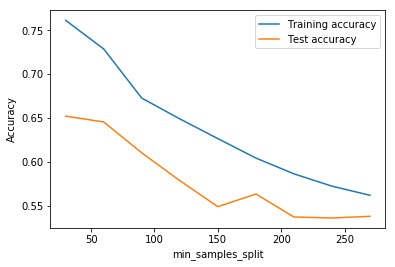

In [277]:
#Accuracy with min_samples_split
plt.figure()
plt.plot(GridSearchCV_ScoreRF4["param_min_samples_split"], 
         GridSearchCV_ScoreRF4["mean_train_score"], 
         label="Training accuracy")
plt.plot(GridSearchCV_ScoreRF4["param_min_samples_split"], 
         GridSearchCV_ScoreRF4["mean_test_score"], 
         label="Test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [278]:
#Parameter grid
param_grid = {
    'max_depth': [6,10],
    'min_samples_leaf': range(30, 200, 30),
    'min_samples_split': range(30, 200, 30),
    'n_estimators': range(100, 800, 400), 
    'max_features': [20, 30, 40, 50]
}
# Create a based model
RandomForest_Model_HP5 = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_searchRF = GridSearchCV(estimator = RandomForest_Model_HP5, param_grid = param_grid, refit='recall_score', cv = 5, n_jobs=-1, verbose = 1)

grid_searchRF.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 40.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [6, 10], 'min_samples_leaf': range(30, 200, 30), 'min_samples_split': range(30, 200, 30), 'n_estimators': range(100, 800, 400), 'max_features': [20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [279]:
#Printing the optimal accuracy score and hyperparameters
print('The accuracy of',grid_searchRF.best_score_,'with',grid_searchRF.best_params_)

The accuracy of 0.7148452800626713 with {'max_depth': 10, 'max_features': 30, 'min_samples_leaf': 30, 'min_samples_split': 30, 'n_estimators': 500}


In [280]:
#Model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
RandomForest_Model_BestHP = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=30, 
                             min_samples_split=30,
                             max_features=22,
                             n_estimators=500)

RandomForest_Model_BestHP.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=30,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [281]:
#Predict
y_pred_RandomForestHP = RandomForest_Model_BestHP.predict(X_test)

In [282]:
print(classification_report(y_test,y_pred_RandomForestHP))
print(confusion_matrix(y_test,y_pred_RandomForestHP))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_RandomForestHP))

              precision    recall  f1-score   support

           1       0.53      0.78      0.63        37
           2       0.69      0.75      0.72       235
           3       0.81      0.67      0.73       513
           4       0.65      0.73      0.69       275
           5       0.48      0.74      0.58        35

   micro avg       0.71      0.71      0.71      1095
   macro avg       0.63      0.74      0.67      1095
weighted avg       0.72      0.71      0.71      1095

[[ 29   8   0   0   0]
 [ 22 177  34   2   0]
 [  4  69 342  96   2]
 [  0   2  46 201  26]
 [  0   0   1   8  26]]
accuracy_score:   0.7077625570776256


In [283]:
# Confusion Matrix
confusion_mat_RF_HP=confusion_matrix(y_test,y_pred_RandomForestHP)
confusion_mat_RF_HP

array([[ 29,   8,   0,   0,   0],
       [ 22, 177,  34,   2,   0],
       [  4,  69, 342,  96,   2],
       [  0,   2,  46, 201,  26],
       [  0,   0,   1,   8,  26]], dtype=int64)

In [284]:
TP = confusion_mat_RF_HP[1,1] # true positive 
TN = confusion_mat_RF_HP[0,0] # true negatives
FP = confusion_mat_RF_HP[0,1] # false positives
FN = confusion_mat_RF_HP[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_RandomForestHP)*100)   #Accuracy
print('Sensitivity: ', TP / float(TP+FN)*100)  #Sensitivity
print('Specificity: ',TN / float(TN+FP)*100)   #Specificity
print('False Postive Rate: ',FP/ float(TN+FP)*100)  #FPR
print('Positive Predictive Value: ', TP / float(TP+FP)*100)  #PPV
print('Negative Predictive Value: ',TN / float(TN+ FN)*100)  #NPV
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN)*100)  #Misclassification rate

Accuracy Score on test data:  70.77625570776256
Sensitivity:  88.94472361809045
Specificity:  78.37837837837837
False Postive Rate:  21.62162162162162
Positive Predictive Value:  95.67567567567568
Negative Predictive Value:  56.86274509803921
Misclassification Rate:  12.711864406779661


In [285]:
#Identify the best features in data set

from collections import OrderedDict
features_name=X_train.columns.values
important_features_Dictionary = {}
for name, importance in zip(features_name, RandomForest_Model_BestHP.feature_importances_):
    important_features_Dictionary[name]=importance

#Sorting Dictionary in descending order of the importance variable
Dictionary_Order = OrderedDict(sorted(important_features_Dictionary.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [286]:
#Variable Importance top 30 variable
v = dict(Dictionary_Order)

from itertools import islice

def k (p, q):
    return islice(q, p)

p=15
p_items = k(p, v.items())

In [287]:
LevelOfImportance = RandomForest_Model_BestHP.feature_importances_
names = X_train.columns.values
LevelOfImportance,names = zip(*sorted(zip(LevelOfImportance,names)))

data_df1 = pd.DataFrame({"Variable":names,"Importance":LevelOfImportance})
data_df2 = data_df1.sort_values(by="Importance",axis=0,ascending=False)
data_df2 = data_df2.reset_index(drop=True)

In [288]:
data_df2[0:15]

,Variable,Importance
0,READM_30_HOSP_WIDE,0.280652
1,PSI_90_SAFETY,0.137162
2,H_RECMND_LINEAR_SCORE,0.134412
3,H_COMP_1_LINEAR_SCORE,0.111876
4,H_COMP_5_LINEAR_SCORE,0.042896
5,MORT_30_PN,0.032134
6,ED_1b,0.030809
7,READM_30_PN,0.021840
8,H_CLEAN_LINEAR_SCORE,0.018899
9,MORT_30_HF,0.016558


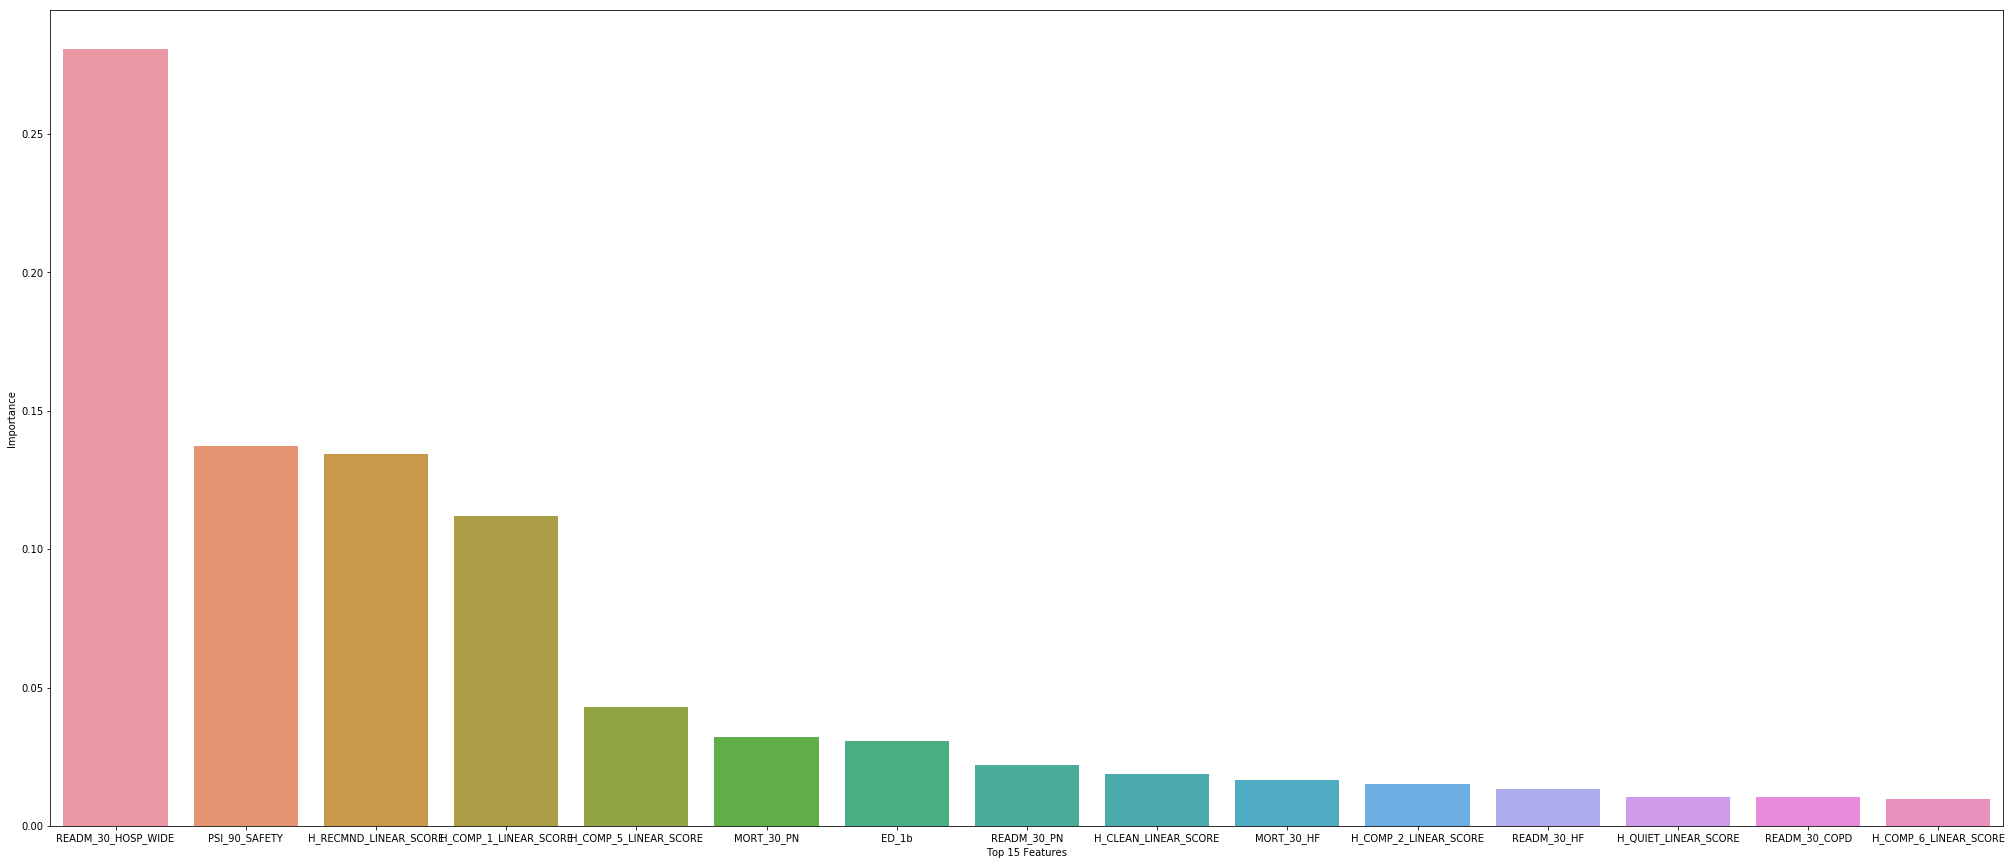

In [289]:
plt.figure(figsize=(35, 15))

ax = sns.barplot(x='Variable', y= 'Importance', data=data_df2[0:15])
ax.set(xlabel = 'Top 15 Features', ylabel = 'Importance')
plt.show()

#### Distribution of Important measures/Outcomes from RandomForest Vs ratings

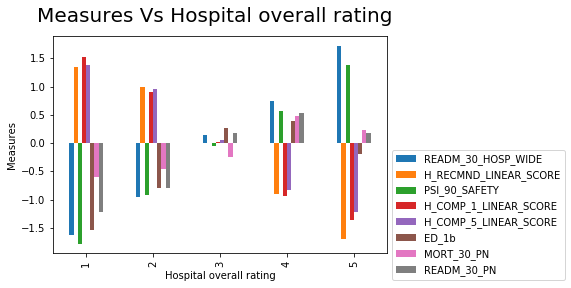

In [290]:
Master_frame['Hospital overall rating'] = Master_frame['Hospital overall rating'].astype('object', copy = False)
df_plot = Master_frame.groupby(['Hospital overall rating'])['READM_30_HOSP_WIDE', 'H_RECMND_LINEAR_SCORE', 
                                                            'PSI_90_SAFETY','H_COMP_1_LINEAR_SCORE','H_COMP_5_LINEAR_SCORE',
                                                            'ED_1b','MORT_30_PN','READM_30_PN'].median()
df_plot.plot.bar()
plt.ylabel('Measures')
plt.xlabel('Hospital overall rating')
plt.suptitle("Measures Vs Hospital overall rating", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')
plt.show()

### Clustering with Unweighted

In [291]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [292]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [293]:
hopkins(Master_frame.drop(['Provider ID','Hospital overall rating'],axis=1))

0.691675587708257

In [294]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [295]:
dat3 = Master_frame
dat3_1 = standard_scaler.fit_transform(dat3.drop(['Provider ID','Hospital overall rating'],axis=1))

### K-Means

In [296]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

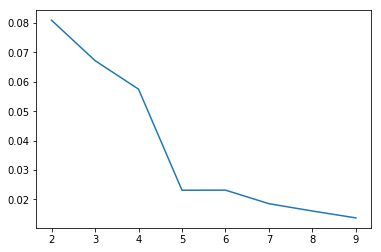

In [297]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

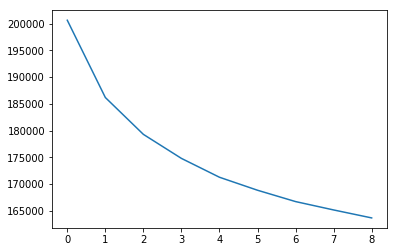

In [298]:
ssd = []
for num_clusters in range(1,10):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [299]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [300]:
dat4=dat3
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.head()

,Provider ID,Hospital overall rating,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,...,HAI_6_SIR,PSI_90_SAFETY,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,0
0,10001,3,1.040090,-1.615945,-1.111702,0.608973,-1.324958,0.293986,-1.223287,-0.790168,...,0.430727,1.639539,1.059682,0.899534,-0.369558,0.723343,-0.290058,-1.199766,-0.656486,4
1,10005,3,0.868016,-0.022584,1.786156,0.286135,-2.043115,0.982556,0.613509,-1.255743,...,1.084434,0.580524,1.286702,0.546700,-1.100140,-0.607463,-0.540882,-0.807429,-0.441766,3
2,10006,2,1.401177,-1.689670,0.395204,1.161976,-1.176890,0.293986,-0.793602,0.977487,...,0.914389,-0.702315,1.286702,0.546700,-1.100140,0.500651,1.340200,-0.807429,1.169401,3
3,10007,3,-0.002509,-0.022584,0.325577,0.810910,-0.085414,-1.318946,-0.415634,-0.790168,...,5.199338,0.935852,-0.703922,0.546700,-1.873053,-1.042247,0.650274,-1.994971,0.802226,3
4,10008,3,-0.002509,-0.022584,0.873515,-1.037937,-0.085414,-0.377630,0.920412,-0.052716,...,0.791884,-0.613509,-0.023839,0.015055,0.156199,0.046436,0.166367,-0.011291,0.003764,3


In [301]:
dat_km[0].value_counts()

3    922
1    755
4    690
2    648
0    633
Name: 0, dtype: int64

### Clustering with Weights

### Factor Analysis

In [302]:
## Creating new dataframes for factor analysis
Mortality_pivot_score=Mortality_pivot
Readmission_pivot_score=Readmission_pivot
Effective_care_pivot_score=Effective_care_pivot
Timely_care_pivot_score=Timely_care_pivot
patient_experience_pivot_score=patient_experience_pivot
imaging_pivot_score=imaging_pivot
Safety_care_pivot_score=Safety_care_pivot

### Bartlett Test for finding the possiblity of factor analysis

In [303]:
chi_square_value_mor,p_value_mor=calculate_bartlett_sphericity(Mortality_final)
chi_square_value_mor, p_value_mor

(3337.090627991771, 0.0)

In [304]:
chi_square_value_read,p_value_read=calculate_bartlett_sphericity(Readmission_final)
chi_square_value_read, p_value_read

(7101.567164004733, 0.0)

In [305]:
chi_square_value_eff,p_value_eff=calculate_bartlett_sphericity(Effective_care_final)
chi_square_value_eff, p_value_eff

(11777.292344928474, 0.0)

In [306]:
chi_square_value_time,p_value_time=calculate_bartlett_sphericity(Timely_care_final)
chi_square_value_time, p_value_time

(5872.925973123959, 0.0)

In [307]:
chi_square_value_img,p_value_img=calculate_bartlett_sphericity(imaging_final)
chi_square_value_img, p_value_img

(655.4708088799939, 1.1147424219288364e-134)

In [308]:
chi_square_value_safety,p_value_safety=calculate_bartlett_sphericity(Safety_care_final)
chi_square_value_safety, p_value_safety

(835.9237996018127, 1.0638619253203535e-163)

In [309]:
chi_square_value_patient,p_value_patient=calculate_bartlett_sphericity(patient_experience_final)
chi_square_value_patient, p_value_patient

(21186.15097571202, 0.0)

### KMO Test

In [310]:
kmo_all_mor,kmo_model_mor=calculate_kmo(Mortality_final)
kmo_model_mor

0.7622781486740643

In [311]:
kmo_all_read,kmo_model_read=calculate_kmo(Readmission_final)
kmo_model_read

0.8251190463166194

In [312]:
kmo_all_eff,kmo_model_eff=calculate_kmo(Effective_care_final)
kmo_model_eff

0.8561164397399261

In [313]:
kmo_all_time,kmo_model_time=calculate_kmo(Timely_care_final)
kmo_model_time

0.7283917649991472

In [314]:
kmo_all_patient,kmo_model_patient=calculate_kmo(patient_experience_final)
kmo_model_patient

0.912463514689963

In [315]:
kmo_all_Safe,kmo_model_Safe=calculate_kmo(Safety_care_final)
kmo_model_Safe

0.5355504113911682

In [316]:
kmo_all_img,kmo_model_img=calculate_kmo(imaging_final)
kmo_model_img

0.5049462390572272

In [317]:
# Create factor analysis object and perform factor analysis
fa_mor = FactorAnalyzer()
fa_mor.analyze(Mortality_final,1,rotation=None)
# Check Eigenvalues
ev_mor, v_mor = fa_mor.get_eigenvalues()

fa_mor.loadings

,Factor1
MORT_30_AMI,-0.443449
MORT_30_CABG,-0.235795
MORT_30_COPD,-0.529294
MORT_30_HF,-0.633378
MORT_30_PN,-0.578310
MORT_30_STK,-0.458511
PSI_4_SURG_COMP,-0.206983


In [318]:
Mortality_pivot_score['Mortality_score']=(-0.443449*(Mortality_pivot['MORT_30_AMI'])-0.235795*(Mortality_pivot['MORT_30_CABG'])-0.529294*(Mortality_pivot['MORT_30_COPD'])-0.633378*(Mortality_pivot['MORT_30_HF'])-0.578310*(Mortality_pivot['MORT_30_PN'])-0.458511*(Mortality_pivot['MORT_30_STK'])-0.206983*(Mortality_pivot['PSI_4_SURG_COMP']))/7

In [319]:
Mortality_pivot_score.head(5)

Measure ID,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,Mortality_score
0,10001,1.674186,-1.873053,-1.312981,-0.490721,0.539431,-0.862544,-2.040426,0.172981
1,10005,-1.837975,-0.046436,0.667419,-2.241016,-2.004234,-0.895780,-2.471243,0.567635
2,10006,-2.307607,-1.798663,1.149742,-2.289988,-1.023003,-1.959536,-3.171528,0.633690
3,10007,-0.080379,-0.046436,-1.312981,-1.644369,-1.266860,-1.374878,-0.027604,0.450257
4,10008,-0.080379,-0.046436,-0.507774,-0.662724,0.451469,-0.045180,-0.027604,0.071493


In [320]:
fa_mor.get_factor_variance()

,Factor1
SS Loadings,1.521084
Proportion Var,0.217298
Cumulative Var,0.217298


In [321]:
fa_read = FactorAnalyzer()
fa_read.analyze(Readmission_final, 1, rotation=None)
# Check Eigenvalues
ev_read, v_read = fa_read.get_eigenvalues()

fa_read.loadings

,Factor1
READM_30_AMI,-0.467700
READM_30_CABG,-0.189586
READM_30_COPD,-0.529539
READM_30_HF,-0.640466
READM_30_HIP_KNEE,-0.276135
READM_30_HOSP_WIDE,-0.824128
READM_30_PN,-0.631045
READM_30_STK,-0.472005


In [322]:
Readmission_pivot_score['Readmission_score']=(-0.467700*(Readmission_pivot['READM_30_AMI'])-0.189586*(Readmission_pivot['READM_30_CABG'])-0.529539*(Readmission_pivot['READM_30_COPD'])-0.640466*(Readmission_pivot['READM_30_HF'])-0.276135*(Readmission_pivot['READM_30_HIP_KNEE'])-0.824128*(Readmission_pivot['READM_30_HOSP_WIDE'])-0.631045*(Readmission_pivot['READM_30_PN'])-0.472005*(Readmission_pivot['READM_30_STK']))/8

In [323]:
Readmission_pivot_score.head(5)

Measure ID,Provider ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Readmission_score
0,10001,1.040090,-1.615945,-1.111702,0.608973,-1.324958,0.293986,-1.223287,-0.790168,0.160884
1,10005,0.868016,-0.022584,1.786156,0.286135,-2.043115,0.982556,0.613509,-1.255743,-0.196350
2,10006,1.401177,-1.689670,0.395204,1.161976,-1.176890,0.293986,-0.793602,0.977487,-0.145794
3,10007,-0.002509,-0.022584,0.325577,0.810910,-0.085414,-1.318946,-0.415634,-0.790168,0.132438
4,10008,-0.002509,-0.022584,0.873515,-1.037937,-0.085414,-0.377630,0.920412,-0.052716,-0.001685


In [324]:
fa_eff = FactorAnalyzer()
fa_eff.analyze(Effective_care_final, 1, rotation=None)
# Check Eigenvalues
ev_eff, v_eff = fa_eff.get_eigenvalues()

fa_eff.loadings

,Factor1
IMM_2,-0.555497
IMM_3_OP_27_FAC_ADHPCT,-0.059156
OP_22,0.167919
OP_23,-0.177656
OP_29,-0.247803
OP_30,-0.281945
OP_4,-0.223637
PC_01,0.289350
STK_1,-0.625569
STK_6,-0.549787


In [325]:
Effective_care_pivot_score['Effective_score']=(-0.555497*(Effective_care_pivot['IMM_2'])-0.059156*(Effective_care_pivot['IMM_3_OP_27_FAC_ADHPCT'])+0.167919*(Effective_care_pivot['OP_22'])-0.177656*(Effective_care_pivot['OP_23'])-0.247803*(Effective_care_pivot['OP_29'])-0.281945*(Effective_care_pivot['OP_30'])-0.223637*(Effective_care_pivot['OP_4'])+0.289350*(Effective_care_pivot['PC_01'])-0.625569*(Effective_care_pivot['STK_1'])-0.549787*(Effective_care_pivot['STK_6'])-0.561562*(Effective_care_pivot['STK_8'])-0.653347*(Effective_care_pivot['VTE_1'])-0.638255*(Effective_care_pivot['VTE_2'])-0.467893*(Effective_care_pivot['VTE_3'])-0.538655*(Effective_care_pivot['VTE_5'])+0.340633*(Effective_care_pivot['VTE_6']))/16

In [326]:
Effective_care_pivot_score.head(5)

Measure ID,Provider ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6,Effective_score
0,10001,-0.354822,0.625670,-1.497997,0.047692,0.195700,-0.411534,0.198258,5.199338,-0.670557,-0.833781,1.431971,-0.369558,-0.613509,1.084195,1.223287,5.199338,0.171207
1,10005,-0.955471,0.529301,-0.729877,-1.579968,-0.916587,-0.689529,-0.931971,0.627196,-0.454249,1.625274,-5.199338,-0.092972,1.295363,-5.199338,-5.199338,-0.156199,0.512096
2,10006,-5.199338,-0.067799,0.675277,0.047692,0.864365,-0.556927,0.198258,5.199338,-0.670557,-0.448692,1.278137,-0.596935,1.738731,1.431971,1.114032,5.199338,0.258107
3,10007,-0.955471,1.744448,0.675277,0.047692,5.199338,5.199338,1.744448,-0.251016,2.144011,2.247624,0.231641,-0.369558,-0.613509,0.167640,0.232930,-0.156199,-0.313482
4,10008,-0.064027,2.131682,0.675277,0.047692,-1.164444,-0.989697,0.198258,-0.251016,0.293986,0.292676,0.231641,-0.935852,0.234219,0.167640,0.232930,-0.156199,0.012184


In [327]:
fa_time = FactorAnalyzer()
fa_time.analyze(Timely_care_final, 1, rotation=None)
# Check Eigenvalues
ev_time, v_time = fa_time.get_eigenvalues()

fa_time.loadings

,Factor1
ED_1b,-0.672006
OP_18b,-0.788145
OP_20,-0.689165
OP_21,-0.604466
OP_5,-0.183985


In [328]:
Timely_care_pivot_score['Time_score']=(-0.672006*(Timely_care_pivot['ED_1b'])-0.788145*(Timely_care_pivot['OP_18b'])-0.689165*(Timely_care_pivot['OP_20'])-0.604466*(Timely_care_pivot['OP_21'])-0.183985*(Timely_care_pivot['OP_5']))/5

In [329]:
Timely_care_pivot_score.head(5)

Measure ID,Provider ID,ED_1b,OP_18b,OP_20,OP_21,OP_5,Time_score
0,10001,0.213636,-1.431971,-2.004234,-2.309814,-0.154930,0.758199
1,10005,0.499230,0.791884,-0.567211,-0.785036,-1.475269,0.035451
2,10006,0.848075,0.433482,1.411293,-0.686350,-0.154930,-0.288158
3,10007,0.819656,0.749670,-1.104747,-2.023292,0.812654,0.138637
4,10008,1.446104,1.321946,-0.567211,0.533636,-0.154930,-0.383367


In [330]:
fa_patient = FactorAnalyzer()
fa_patient.analyze(patient_experience_final,1, rotation=None)
# Check Eigenvalues
ev_patient, v_patient = fa_patient.get_eigenvalues()

fa_patient.loadings

,Factor1
H_CLEAN_LINEAR_SCORE,-0.711852
H_COMP_1_LINEAR_SCORE,-0.920658
H_COMP_2_LINEAR_SCORE,-0.804131
H_COMP_5_LINEAR_SCORE,-0.860563
H_COMP_6_LINEAR_SCORE,-0.660535
H_QUIET_LINEAR_SCORE,-0.653838
H_RECMND_LINEAR_SCORE,-0.765614


In [331]:
patient_experience_pivot_score['patient_experience_score']=(-0.711852*(patient_experience_pivot['H_CLEAN_LINEAR_SCORE'])-0.920658*(patient_experience_pivot['H_COMP_1_LINEAR_SCORE'])-0.804131*(patient_experience_pivot['H_COMP_2_LINEAR_SCORE'])-0.860563*(patient_experience_pivot['H_COMP_5_LINEAR_SCORE'])-0.660535*(patient_experience_pivot['H_COMP_6_LINEAR_SCORE'])-0.653838*(patient_experience_pivot['H_QUIET_LINEAR_SCORE'])-0.765614*(patient_experience_pivot['H_RECMND_LINEAR_SCORE']))/7

In [332]:
patient_experience_pivot_score.head(5)

HCAHPS Measure ID,Provider ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,patient_experience_score
0,10001,1.059682,0.899534,-0.369558,0.723343,-0.290058,-1.199766,-0.656486,-0.061307
1,10005,1.286702,0.546700,-1.100140,-0.607463,-0.540882,-0.807429,-0.441766,0.173082
2,10006,1.286702,0.546700,-1.100140,0.500651,1.340200,-0.807429,1.169401,-0.316869
3,10007,-0.703922,0.546700,-1.873053,-1.042247,0.650274,-1.994971,0.802226,0.380218
4,10008,-0.023839,0.015055,0.156199,0.046436,0.166367,-0.011291,0.003764,-0.038264


In [333]:
fa_img = FactorAnalyzer()
fa_img.analyze(imaging_final,1,rotation=None)
# Check Eigenvalues
ev_img, v_img = fa_img.get_eigenvalues()

fa_img.loadings

,Factor1
OP_10,0.635959
OP_11,0.546981
OP_13,0.011016
OP_14,-0.032502
OP_8,0.073549


In [334]:
imaging_pivot_score['imaging_score']=(0.635959*(imaging_pivot['OP_10'])+0.546981*(imaging_pivot['OP_11'])+0.011016*(imaging_pivot['OP_13'])-0.032502*(imaging_pivot['OP_14'])+0.073549*(imaging_pivot['OP_8']))/5

In [335]:
imaging_pivot_score.head(5)

Measure ID,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8,imaging_score
0,10001,0.200818,0.399276,-1.659093,0.743040,1.137677,0.077471
1,10005,-1.090995,-1.554270,-1.010382,-1.189522,-1.255743,-0.321762
2,10006,-0.987652,-1.090995,5.199338,-1.442543,-1.486537,-0.246006
3,10007,-1.615945,-1.255743,-0.022584,-0.330873,-0.021329,-0.341121
4,10008,0.771450,-0.412900,-0.022584,1.674186,-0.021329,0.041706


In [336]:
fa_safe = FactorAnalyzer()
fa_safe.analyze(Safety_care_final,1,rotation=None)
# Check Eigenvalues
ev_safe, v_safe = fa_safe.get_eigenvalues()

fa_safe.loadings

,Factor1
COMP_HIP_KNEE,0.007749
HAI_1_SIR,0.442793
HAI_2_SIR,0.543982
HAI_3_SIR,0.239016
HAI_5_SIR,0.127332
HAI_6_SIR,0.133557
PSI_90_SAFETY,0.212726


In [337]:
Safety_care_pivot_score['Safety_score']=(0.007749*(Safety_care_pivot['COMP_HIP_KNEE'])+0.442793*(Safety_care_pivot['HAI_1_SIR'])+0.543982*(Safety_care_pivot['HAI_2_SIR'])+0.239016*(Safety_care_pivot['HAI_3_SIR'])+0.127332*(Safety_care_pivot['HAI_5_SIR'])+0.133557*(Safety_care_pivot['HAI_6_SIR'])+0.212726*(Safety_care_pivot['PSI_90_SAFETY']))/7

In [338]:
Safety_care_pivot_score.head(5)

Measure ID,Provider ID,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,Safety_score
0,10001,-1.606755,-2.271133,-2.065168,-1.606755,1.320731,0.430727,1.639539,-0.278725
1,10005,0.558392,-1.608401,0.459820,1.263729,-1.317226,1.084434,0.580524,-0.007868
2,10006,-1.606755,0.899899,-0.918498,1.331126,-1.235796,0.914389,-0.702315,0.002843
3,10007,-0.072829,-0.095492,5.199338,0.266584,-0.100535,5.199338,0.935852,0.532843
4,10008,-0.072829,-0.095492,-0.090452,0.266584,-0.100535,0.791884,-0.613509,-0.009412


In [339]:
Master_frame_factor = pd.read_csv("Hospital General Information.csv", encoding="latin-1",
                         usecols=["Provider ID", "Hospital overall rating"])
Master_frame_factor = Master_frame_factor.loc[Master_frame_factor["Hospital overall rating"] != "Not Available"]
Master_frame_factor["Hospital overall rating"] = Master_frame_factor["Hospital overall rating"].astype(int)
Master_frame_factor.head()

,Provider ID,Hospital overall rating
0,10001,3
1,10005,3
2,10006,2
3,10007,3
4,10008,3


In [340]:
Master_frame_factors=pd.merge(Master_frame_factor,Readmission_pivot,on='Provider ID')
Master_frame_factors=pd.merge(Master_frame_factors,imaging_pivot,on='Provider ID')
Master_frame_factors=pd.merge(Master_frame_factors,Effective_care_pivot,on='Provider ID')
Master_frame_factors=pd.merge(Master_frame_factors,Timely_care_pivot,on='Provider ID')
Master_frame_factors=pd.merge(Master_frame_factors,Mortality_pivot,on='Provider ID')
Master_frame_factors=pd.merge(Master_frame_factors,Safety_care_pivot,on='Provider ID')
Master_frame_factors=pd.merge(Master_frame_factors,patient_experience_pivot,on='Provider ID')

In [341]:
Master_frame_factors.head(5)

,Provider ID,Hospital overall rating,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,...,PSI_90_SAFETY,Safety_score,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,patient_experience_score
0,10001,3,1.040090,-1.615945,-1.111702,0.608973,-1.324958,0.293986,-1.223287,-0.790168,...,1.639539,-0.278725,1.059682,0.899534,-0.369558,0.723343,-0.290058,-1.199766,-0.656486,-0.061307
1,10005,3,0.868016,-0.022584,1.786156,0.286135,-2.043115,0.982556,0.613509,-1.255743,...,0.580524,-0.007868,1.286702,0.546700,-1.100140,-0.607463,-0.540882,-0.807429,-0.441766,0.173082
2,10006,2,1.401177,-1.689670,0.395204,1.161976,-1.176890,0.293986,-0.793602,0.977487,...,-0.702315,0.002843,1.286702,0.546700,-1.100140,0.500651,1.340200,-0.807429,1.169401,-0.316869
3,10007,3,-0.002509,-0.022584,0.325577,0.810910,-0.085414,-1.318946,-0.415634,-0.790168,...,0.935852,0.532843,-0.703922,0.546700,-1.873053,-1.042247,0.650274,-1.994971,0.802226,0.380218
4,10008,3,-0.002509,-0.022584,0.873515,-1.037937,-0.085414,-0.377630,0.920412,-0.052716,...,-0.613509,-0.009412,-0.023839,0.015055,0.156199,0.046436,0.166367,-0.011291,0.003764,-0.038264


In [342]:
Master_frame_factors=Master_frame_factors.drop(['MORT_30_AMI','MORT_30_CABG','MORT_30_COPD','MORT_30_HF','MORT_30_PN','MORT_30_STK','PSI_4_SURG_COMP',
'READM_30_AMI','READM_30_CABG','READM_30_COPD','READM_30_HF','READM_30_HIP_KNEE','READM_30_HOSP_WIDE','READM_30_PN','READM_30_STK','ED_1b','OP_18b',
'OP_20','OP_21','OP_5','H_CLEAN_LINEAR_SCORE','H_COMP_1_LINEAR_SCORE','H_COMP_2_LINEAR_SCORE','H_COMP_5_LINEAR_SCORE','H_COMP_6_LINEAR_SCORE',
'H_QUIET_LINEAR_SCORE','H_RECMND_LINEAR_SCORE','IMM_2','IMM_3_OP_27_FAC_ADHPCT','OP_22','OP_23','OP_29','OP_30','OP_4','PC_01','STK_1','STK_6','STK_8',
'VTE_1','VTE_2','VTE_3','VTE_5','VTE_6','OP_10','OP_11','OP_13','OP_14','OP_8','COMP_HIP_KNEE','HAI_1_SIR','HAI_2_SIR','HAI_3_SIR','HAI_5_SIR','HAI_6_SIR','PSI_90_SAFETY'],axis=1)

In [343]:
Master_frame_factors.head(5)

,Provider ID,Hospital overall rating,Readmission_score,imaging_score,Effective_score,Time_score,Mortality_score,Safety_score,patient_experience_score
0,10001,3,0.160884,0.077471,0.171207,0.758199,0.172981,-0.278725,-0.061307
1,10005,3,-0.196350,-0.321762,0.512096,0.035451,0.567635,-0.007868,0.173082
2,10006,2,-0.145794,-0.246006,0.258107,-0.288158,0.633690,0.002843,-0.316869
3,10007,3,0.132438,-0.341121,-0.313482,0.138637,0.450257,0.532843,0.380218
4,10008,3,-0.001685,0.041706,0.012184,-0.383367,0.071493,-0.009412,-0.038264


In [344]:
hopkins(Master_frame_factors.drop(['Provider ID','Hospital overall rating'],axis=1))

0.7840029651246091

In [345]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [346]:
dat3 = Master_frame_factors
dat3_1 = standard_scaler.fit_transform(dat3.drop(['Provider ID','Hospital overall rating'],axis=1))

In [347]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

### Error Sum of Squares (SSE)

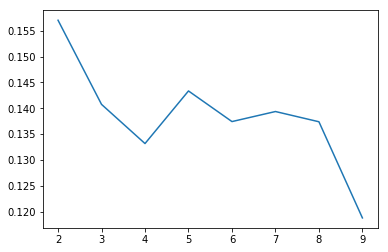

In [348]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

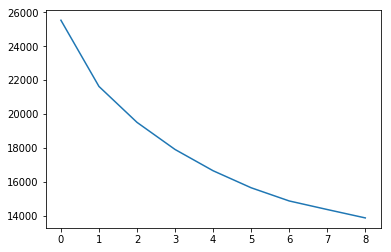

In [349]:
ssd = []
for num_clusters in range(1,10):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [506]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [507]:
dat4=dat3
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.columns = ['Provider ID', 'Hospital overall rating','Readmission_score','imaging_score','Effective_score','Time_score',
                  'Mortality_score','Safety_score','patient_experience_score','Predicted_rating']
dat_km.head()

,Provider ID,Hospital overall rating,Readmission_score,imaging_score,Effective_score,Time_score,Mortality_score,Safety_score,patient_experience_score,Predicted_rating
0,10001,3,0.160884,0.077471,0.171207,0.758199,0.172981,-0.278725,-0.061307,3
1,10005,3,-0.196350,-0.321762,0.512096,0.035451,0.567635,-0.007868,0.173082,2
2,10006,2,-0.145794,-0.246006,0.258107,-0.288158,0.633690,0.002843,-0.316869,2
3,10007,3,0.132438,-0.341121,-0.313482,0.138637,0.450257,0.532843,0.380218,1
4,10008,3,-0.001685,0.041706,0.012184,-0.383367,0.071493,-0.009412,-0.038264,2


In [508]:
dat_km['Predicted_rating'].value_counts()

2    1109
3     760
1     623
0     598
4     558
Name: Predicted_rating, dtype: int64

In [516]:
#Actual Ratings
print("Rating_1",Rating_1)
print("Rating_2",Rating_2)
print("Rating_3",Rating_3)
print("Rating_4",Rating_4)
print("Rating_5",Rating_5)

Rating_1 117
Rating_2 684
Rating_3 1772
Rating_4 964
Rating_5 111


By comparing Actual Ratings and Predicted_rating from Clustering,

#### Predicted_rating-2 should be Rating_3
#### Predicted_rating-3 should be Rating_4
#### Predicted_rating-1 should be Rating_2
#### Predicted_rating-0 should be Rating_1
#### Predicted_rating-4 should be Rating_5

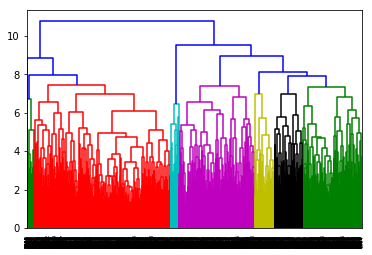

In [390]:
mergings = linkage(dat3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

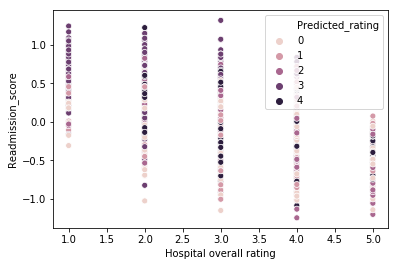

In [391]:
sns.scatterplot(x='Hospital overall rating',y='Readmission_score',hue='Predicted_rating',legend='full',data=dat_km)

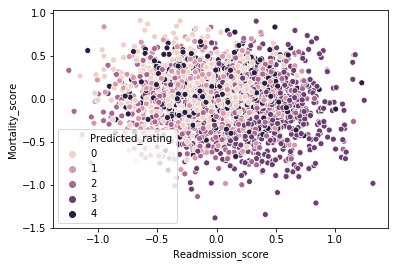

In [392]:
sns.scatterplot(x='Readmission_score',y='Mortality_score',hue='Predicted_rating',legend='full',data=dat_km)

In [509]:
dat_km.head(5)

,Provider ID,Hospital overall rating,Readmission_score,imaging_score,Effective_score,Time_score,Mortality_score,Safety_score,patient_experience_score,Predicted_rating
0,10001,3,0.160884,0.077471,0.171207,0.758199,0.172981,-0.278725,-0.061307,3
1,10005,3,-0.196350,-0.321762,0.512096,0.035451,0.567635,-0.007868,0.173082,2
2,10006,2,-0.145794,-0.246006,0.258107,-0.288158,0.633690,0.002843,-0.316869,2
3,10007,3,0.132438,-0.341121,-0.313482,0.138637,0.450257,0.532843,0.380218,1
4,10008,3,-0.001685,0.041706,0.012184,-0.383367,0.071493,-0.009412,-0.038264,2


In [510]:
Evan=dat_km.loc[dat_km['Provider ID']==140010]

In [511]:
Evan

,Provider ID,Hospital overall rating,Readmission_score,imaging_score,Effective_score,Time_score,Mortality_score,Safety_score,patient_experience_score,Predicted_rating
908,140010,3,-0.222502,0.051082,0.574631,0.395178,-0.972679,-0.228244,-0.306201,3


In [512]:
print("Readmission_score",dat_km.groupby('Predicted_rating')['Readmission_score'].mean())
print("imaging_score",dat_km.groupby('Predicted_rating')['imaging_score'].mean())
print("Effective_score",dat_km.groupby('Predicted_rating')['Effective_score'].mean())
print("Time_score",dat_km.groupby('Predicted_rating')['Time_score'].mean())
print("Mortality_score",dat_km.groupby('Predicted_rating')['Mortality_score'].mean())
print("Safety_score",dat_km.groupby('Predicted_rating')['Safety_score'].mean())
print("patient_experience_score",dat_km.groupby('Predicted_rating')['patient_experience_score'].mean())

Readmission_score Predicted_rating
0   -0.048541
1   -0.022115
2   -0.135747
3    0.297684
4   -0.092144
Name: Readmission_score, dtype: float64
imaging_score Predicted_rating
0    0.116382
1   -0.040770
2   -0.065254
3    0.087528
4    0.673674
Name: imaging_score, dtype: float64
Effective_score Predicted_rating
0    1.060063
1    0.284498
2    0.059847
3    0.260378
4    0.258101
Name: Effective_score, dtype: float64
Time_score Predicted_rating
0   -0.131851
1   -0.153234
2   -0.126813
3    0.499297
4   -0.067690
Name: Time_score, dtype: float64
Mortality_score Predicted_rating
0   -0.062733
1    0.056405
2    0.070080
3   -0.143540
4    0.027413
Name: Mortality_score, dtype: float64
Safety_score Predicted_rating
0    0.090892
1    0.523640
2   -0.009060
3   -0.055801
4    0.071609
Name: Safety_score, dtype: float64
patient_experience_score Predicted_rating
0   -0.037778
1    0.139493
2    0.309609
3   -0.677497
4    0.148583
Name: patient_experience_score, dtype: float64


Recommendations for Hospital EVANSTON HOSPITAL(140010):-
1. Readmission is lesser than overall avg of the group, which means it is performing good in Readmissions.
2. Mortality should be lesser than overall group avg and it's the same in our case.
3. Patient experience value should be above the Overall avg but in our case it's lesser than the overall avg of the group.
So need an attention in improving patient experience.
4. Safety of care should be above overall group avg for good hospital. In our case it's very less. So it needs an improvement.